In [1]:
#Importación de librerías
import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score


1. Búsqueda de Conjuntos de Datos:
Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

In [3]:
# Cargar datasets
df_1 = pd.read_csv('C:/Users/edamv/Machine_Learning_cores/WineQT.csv') 

df_2 = pd.read_csv('C:/Users/edamv/examen_19102024/ventas_videojuegos_2024.csv')  #C:\Users\edamv\examen_19102024

df_3 = pd.read_csv('C:/Users/edamv/examen_23102024/hotel_bookings.csv') #C:\Users\edamv\examen_23102024

df_4 = pd.read_csv('C:/Users/edamv/examen_26102024/telco_customer_churn.csv') #C:\Users\edamv\examen_26102024

# Mostrar información básica Dataset 1: Wine Quality 
print(f"comienzo: {"-"*400}") 
print(f"WineQT: {df_1.head(5)}") 
print(f"cola: {"-"*400}") 
print(f"WineQT: {df_1.tail(5)}") 

# Mostrar información básica Dataset 2: Videojuegos 
print(f"comienzo: {"-"*400}") 
print(f"VideoG: {df_2.head(5)}") 
print(f"cola: {"-"*400}") 
print(f"VideoG: {df_2.tail(5)}") 

# Mostrar información básica Dataset 3: Hotel Bookings 
print(f"comienzo: {"-"*400}") 
print(f"HotelB: {df_3.head(5)}") 
print(f"cola: {"-"*400}") 
print(f"HotelB: {df_3.tail(5)}")

# Mostrar información básica Dataset 4: Telco Customer Churn 
print(f"comienzo: {"-"*400}") 
print(f"TCC: {df_4.head(5)}") 
print(f"cola: {"-"*400}") 
print(f"TCC: {df_4.tail(5)}") 

comienzo: ----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
WineQT:    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                

Detalles del EDA Inicial

Descripción del Conjunto de Datos:
Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.
Análisis Estadístico Descriptivo:
Calcular estadísticas descriptivas básicas (media, mediana, desviación estándar, etc.) para las variables numéricas.
Analizar la distribución de las variables categóricas.
Visualizaciones:
Crear visualizaciones para entender la distribución de las variables (histogramas, gráficos de barras, box plots, etc.).
Visualizar las correlaciones entre variables (mapa de calor de correlación).
Identificación de Valores Nulos y Outliers:
Detectar valores nulos y discutir cómo podrían ser tratados.
Identificar outliers y evaluar su impacto potencial en el análisis.
Resumen de Hallazgos:
Resumir los principales hallazgos de cada EDA, destacando las características y desafíos únicos de cada conjunto de datos.

In [4]:
# Info Dataset 1
df_1.info()

# Info Dataset 2
df_2.info()

# Info Dataset 3
df_3.info()

# Info Dataset 4
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64016 entries, 0 to 64015

In [8]:
# Shape
print(f"Df_1: , {df_1.shape}")
print(f"Df_2: , {df_2.shape}")
print(f"Df_3: , {df_3.shape}")
print(f"Df_4: , {df_4.shape}")

Df_1: , (1143, 13)
Df_2: , (64016, 14)
Df_3: , (119390, 32)
Df_4: , (7043, 21)


2. Análisis Exploratorio de Datos (EDA) Inicial:
Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
Documentar los hallazgos de cada EDA en un notebook de Jupyter.

In [12]:
# DF_1
# Verificar filas duplicadas 
duplicados = df_1.duplicated() 
# Mostrar el número total de filas duplicadas 
print(f"Número total de filas duplicadas: {duplicados.sum()}") 

# Mostrar las filas duplicadas, si las hay 
if duplicados.any(): 
    print("Filas duplicadas:") 
    print(df_1[duplicados]) 
else: 
    print("No hay filas duplicadas.")

Número total de filas duplicadas: 0
No hay filas duplicadas.


In [13]:
# DF_2

# Verificar filas duplicadas 
duplicados = df_2.duplicated() 
# Mostrar el número total de filas duplicadas 
print(f"Número total de filas duplicadas: {duplicados.sum()}") 

# Mostrar las filas duplicadas, si las hay 
if duplicados.any(): 
    print("Filas duplicadas:") 
    print(df_2[duplicados]) 
else: 
    print("No hay filas duplicadas.")

Número total de filas duplicadas: 0
No hay filas duplicadas.


In [14]:
# DF_3

# Verificar filas duplicadas 
duplicados = df_3.duplicated() 
# Mostrar el número total de filas duplicadas 
print(f"Número total de filas duplicadas: {duplicados.sum()}") 

# Mostrar las filas duplicadas, si las hay 
if duplicados.any(): 
    print("Filas duplicadas:") 
    print(df_3[duplicados]) 
else: 
    print("No hay filas duplicadas.")

Número total de filas duplicadas: 31994
Filas duplicadas:
               hotel  is_canceled  lead_time  arrival_date_year  \
5       Resort Hotel            0         14               2015   
22      Resort Hotel            0         72               2015   
43      Resort Hotel            0         70               2015   
138     Resort Hotel            1          5               2015   
200     Resort Hotel            0          0               2015   
...              ...          ...        ...                ...   
119349    City Hotel            0        186               2017   
119352    City Hotel            0         63               2017   
119353    City Hotel            0         63               2017   
119354    City Hotel            0         63               2017   
119373    City Hotel            0        175               2017   

       arrival_date_month  arrival_date_week_number  \
5                    July                        27   
22                   July  

In [15]:
# DF_4

# Verificar filas duplicadas 
duplicados = df_4.duplicated() 
# Mostrar el número total de filas duplicadas 
print(f"Número total de filas duplicadas: {duplicados.sum()}") 

# Mostrar las filas duplicadas, si las hay 
if duplicados.any(): 
    print("Filas duplicadas:") 
    print(df_4[duplicados]) 
else: 
    print("No hay filas duplicadas.")

Número total de filas duplicadas: 0
No hay filas duplicadas.


Los datasets 1,2 y 4 no tienen duplicados, sin embargo, el 3 sí.

In [16]:
#DF1

# Verificar datos nulos sample
qsna=df_1.shape[0]-df_1.isnull().sum(axis=0)
qna=df_1.isnull().sum(axis=0)
ppna=round(100*(df_1.isnull().sum(axis=0)/df_1.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
fixed acidity,1143,0,0.0
volatile acidity,1143,0,0.0
citric acid,1143,0,0.0
residual sugar,1143,0,0.0
chlorides,1143,0,0.0
free sulfur dioxide,1143,0,0.0
total sulfur dioxide,1143,0,0.0
density,1143,0,0.0
pH,1143,0,0.0
sulphates,1143,0,0.0


In [17]:
#DF2

# Verificar datos nulos sample
qsna=df_2.shape[0]-df_2.isnull().sum(axis=0)
qna=df_2.isnull().sum(axis=0)
ppna=round(100*(df_2.isnull().sum(axis=0)/df_2.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
critic_score,6678,57338,89.57
jp_sales,6726,57290,89.49
na_sales,12637,51379,80.26
pal_sales,12824,51192,79.97
other_sales,15128,48888,76.37
last_update,17879,46137,72.07
total_sales,18922,45094,70.44
release_date,56965,7051,11.01
developer,63999,17,0.03
publisher,64016,0,0.00


In [18]:
#DF3

# Verificar datos nulos sample
qsna=df_3.shape[0]-df_3.isnull().sum(axis=0)
qna=df_3.isnull().sum(axis=0)
ppna=round(100*(df_3.isnull().sum(axis=0)/df_3.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
company,6797,112593,94.31
agent,103050,16340,13.69
country,118902,488,0.41
hotel,119390,0,0.00
arrival_date_month,119390,0,0.00
arrival_date_week_number,119390,0,0.00
lead_time,119390,0,0.00
is_canceled,119390,0,0.00
stays_in_weekend_nights,119390,0,0.00
stays_in_week_nights,119390,0,0.00


In [19]:
#DF4

# Verificar datos nulos sample
qsna=df_4.shape[0]-df_4.isnull().sum(axis=0)
qna=df_4.isnull().sum(axis=0)
ppna=round(100*(df_4.isnull().sum(axis=0)/df_4.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
customerID,7043,0,0.0
gender,7043,0,0.0
SeniorCitizen,7043,0,0.0
Partner,7043,0,0.0
Dependents,7043,0,0.0
tenure,7043,0,0.0
PhoneService,7043,0,0.0
MultipleLines,7043,0,0.0
InternetService,7043,0,0.0
OnlineSecurity,7043,0,0.0


Los datasets 1 y 4 no tienen valores nulos. Por otra parte, los datasets 2 y 3 sí cuentan con valores nulos. En el dataset 2 podrían ser tratados por imputación, sin embargo en el dataset 3 se podrían eliminar algunas columnas.

In [20]:
# Estadísticas Df_1

df_1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [21]:
# Estadísticas Df_2

df_2.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6678.000000,18922.000000,12637.000000,6726.000000,12824.000000,15128.000000
mean,7.220440,0.349113,0.264740,0.102281,0.149472,0.043041
std,1.457066,0.807462,0.494787,0.168811,0.392653,0.126643
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.030000,0.050000,0.020000,0.010000,0.000000
50%,7.500000,0.120000,0.120000,0.040000,0.040000,0.010000
75%,8.300000,0.340000,0.280000,0.120000,0.140000,0.030000
max,10.000000,20.320000,9.760000,2.130000,9.850000,3.120000


In [22]:
# Estadísticas Df_3

df_3.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [23]:
# Estadísticas Df_4

df_4.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [24]:
#Verificar columnas y contenido Df_1

# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna in dataframe.columns:
        valores_unicos = dataframe[columna].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 10 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print(f"Formato de columna: {dataframe[columna].dtype}")
        print(f"Cantidad de ceros: {dataframe[columna].isnull().sum()}")
        #print(f"Cantidad de duplicados: {dataframe[columna].duplicated().sum()}") #Verifica el contenido duplicado de cada columna por ende no es válido
        print("-" * 40)

## Uso de la función con tu DataFrame
verificar_contenido_columnas(df_1)
#valores formatos anómalos: free sulfur dioxide, total sulfur dioxide de float a int

Columna: fixed acidity
Ejemplos de valores: [ 7.4  7.8 11.2  7.9  7.3  6.7  5.6  8.5  7.6  6.9]
Cantidad de valores únicos: 91
Formato de columna: float64
Cantidad de ceros: 0
----------------------------------------
Columna: volatile acidity
Ejemplos de valores: [0.7   0.88  0.76  0.28  0.66  0.6   0.65  0.58  0.615 0.61 ]
Cantidad de valores únicos: 135
Formato de columna: float64
Cantidad de ceros: 0
----------------------------------------
Columna: citric acid
Ejemplos de valores: [0.   0.04 0.56 0.06 0.02 0.08 0.29 0.51 0.31 0.21]
Cantidad de valores únicos: 77
Formato de columna: float64
Cantidad de ceros: 0
----------------------------------------
Columna: residual sugar
Ejemplos de valores: [1.9 2.6 2.3 1.8 1.6 1.2 2.  2.4 1.4 5.5]
Cantidad de valores únicos: 80
Formato de columna: float64
Cantidad de ceros: 0
----------------------------------------
Columna: chlorides
Ejemplos de valores: [0.076 0.098 0.092 0.075 0.069 0.065 0.073 0.097 0.089 0.114]
Cantidad de valores únicos:

In [25]:
#Verificar columnas y contenido Df_2

# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna in dataframe.columns:
        valores_unicos = dataframe[columna].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 10 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print(f"Formato de columna: {dataframe[columna].dtype}")
        print(f"Cantidad de ceros: {dataframe[columna].isnull().sum()}")
        #print(f"Cantidad de duplicados: {dataframe[columna].duplicated().sum()}") #Verifica el contenido duplicado de cada columna por ende no es válido
        print("-" * 40)

## Uso de la función con tu DataFrame
verificar_contenido_columnas(df_2)
#valores formatos anómalos: free sulfur dioxide, total sulfur dioxide de float a int

Columna: img
Ejemplos de valores: ['/games/boxart/full_6510540AmericaFrontccc.jpg'
 '/games/boxart/full_5563178AmericaFrontccc.jpg'
 '/games/boxart/827563ccc.jpg'
 '/games/boxart/full_9218923AmericaFrontccc.jpg'
 '/games/boxart/full_4990510AmericaFrontccc.jpg'
 '/games/boxart/full_call-of-duty-modern-warfare-3_517AmericaFront.jpg'
 '/games/boxart/full_call-of-duty-black-ops_5AmericaFront.jpg'
 '/games/boxart/full_4653215AmericaFrontccc.jpg'
 '/games/boxart/full_1977964AmericaFrontccc.jpg'
 '/games/boxart/full_4649679AmericaFrontccc.png']
Cantidad de valores únicos: 56177
Formato de columna: object
Cantidad de ceros: 0
----------------------------------------
Columna: title
Ejemplos de valores: ['Grand Theft Auto V' 'Grand Theft Auto: Vice City'
 'Call of Duty: Black Ops 3' 'Call of Duty: Modern Warfare 3'
 'Call of Duty: Black Ops' 'Red Dead Redemption 2'
 'Call of Duty: Black Ops II' 'Call of Duty: Modern Warfare 2'
 'Call of Duty: WWII' 'Grand Theft Auto III']
Cantidad de valores úni

In [26]:
#Verificar columnas y contenido

# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna in dataframe.columns:
        valores_unicos = dataframe[columna].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 10 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print(f"Formato de columna: {dataframe[columna].dtype}")
        print(f"Cantidad de ceros: {dataframe[columna].isnull().sum()}")
        #print(f"Cantidad de duplicados: {dataframe[columna].duplicated().sum()}") #Verifica el contenido duplicado de cada columna por ende no es válido
        print("-" * 40)

## Uso de la función con tu DataFrame
verificar_contenido_columnas(df_3)
#valores formatos anómalos: free sulfur dioxide, total sulfur dioxide de float a int

Columna: hotel
Ejemplos de valores: ['Resort Hotel' 'City Hotel']
Cantidad de valores únicos: 2
Formato de columna: object
Cantidad de ceros: 0
----------------------------------------
Columna: is_canceled
Ejemplos de valores: [0 1]
Cantidad de valores únicos: 2
Formato de columna: int64
Cantidad de ceros: 0
----------------------------------------
Columna: lead_time
Ejemplos de valores: [342 737   7  13  14   0   9  85  75  23]
Cantidad de valores únicos: 479
Formato de columna: int64
Cantidad de ceros: 0
----------------------------------------
Columna: arrival_date_year
Ejemplos de valores: [2015 2016 2017]
Cantidad de valores únicos: 3
Formato de columna: int64
Cantidad de ceros: 0
----------------------------------------
Columna: arrival_date_month
Ejemplos de valores: ['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April']
Cantidad de valores únicos: 12
Formato de columna: object
Cantidad de ceros: 0
------------------------------------

In [27]:
#Verificar columnas y contenido Df_4

# Función para verificar el contenido de cada columna
def verificar_contenido_columnas(dataframe):
    for columna in dataframe.columns:
        valores_unicos = dataframe[columna].unique()  # Obtener todos los valores únicos
        print(f"Columna: {columna}")
        print(f"Ejemplos de valores: {valores_unicos[:10]}")  # Muestra los primeros 10 valores únicos
        print(f"Cantidad de valores únicos: {len(valores_unicos)}")
        print(f"Formato de columna: {dataframe[columna].dtype}")
        print(f"Cantidad de ceros: {dataframe[columna].isnull().sum()}")
        #print(f"Cantidad de duplicados: {dataframe[columna].duplicated().sum()}") #Verifica el contenido duplicado de cada columna por ende no es válido
        print("-" * 40)

## Uso de la función con tu DataFrame
verificar_contenido_columnas(df_4)
#valores formatos anómalos: free sulfur dioxide, total sulfur dioxide de float a int

Columna: customerID
Ejemplos de valores: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' '7795-CFOCW' '9237-HQITU'
 '9305-CDSKC' '1452-KIOVK' '6713-OKOMC' '7892-POOKP' '6388-TABGU']
Cantidad de valores únicos: 7043
Formato de columna: object
Cantidad de ceros: 0
----------------------------------------
Columna: gender
Ejemplos de valores: ['Female' 'Male']
Cantidad de valores únicos: 2
Formato de columna: object
Cantidad de ceros: 0
----------------------------------------
Columna: SeniorCitizen
Ejemplos de valores: [0 1]
Cantidad de valores únicos: 2
Formato de columna: int64
Cantidad de ceros: 0
----------------------------------------
Columna: Partner
Ejemplos de valores: ['Yes' 'No']
Cantidad de valores únicos: 2
Formato de columna: object
Cantidad de ceros: 0
----------------------------------------
Columna: Dependents
Ejemplos de valores: ['No' 'Yes']
Cantidad de valores únicos: 2
Formato de columna: object
Cantidad de ceros: 0
----------------------------------------
Columna: tenure
Eje

Observaciones en el primer dataset: todas las variables son numéricas.
Observaciones en el segundo dataset: existe una buena proporción entre variables numéricas y categóricas.
Observaciones en el tercer dataset: hay mucha cantidad de variables numéricas.
Observacioens en el cuarto dataset: existen columnas que necesitan ser cambiadas de formato.

Visualizaciones

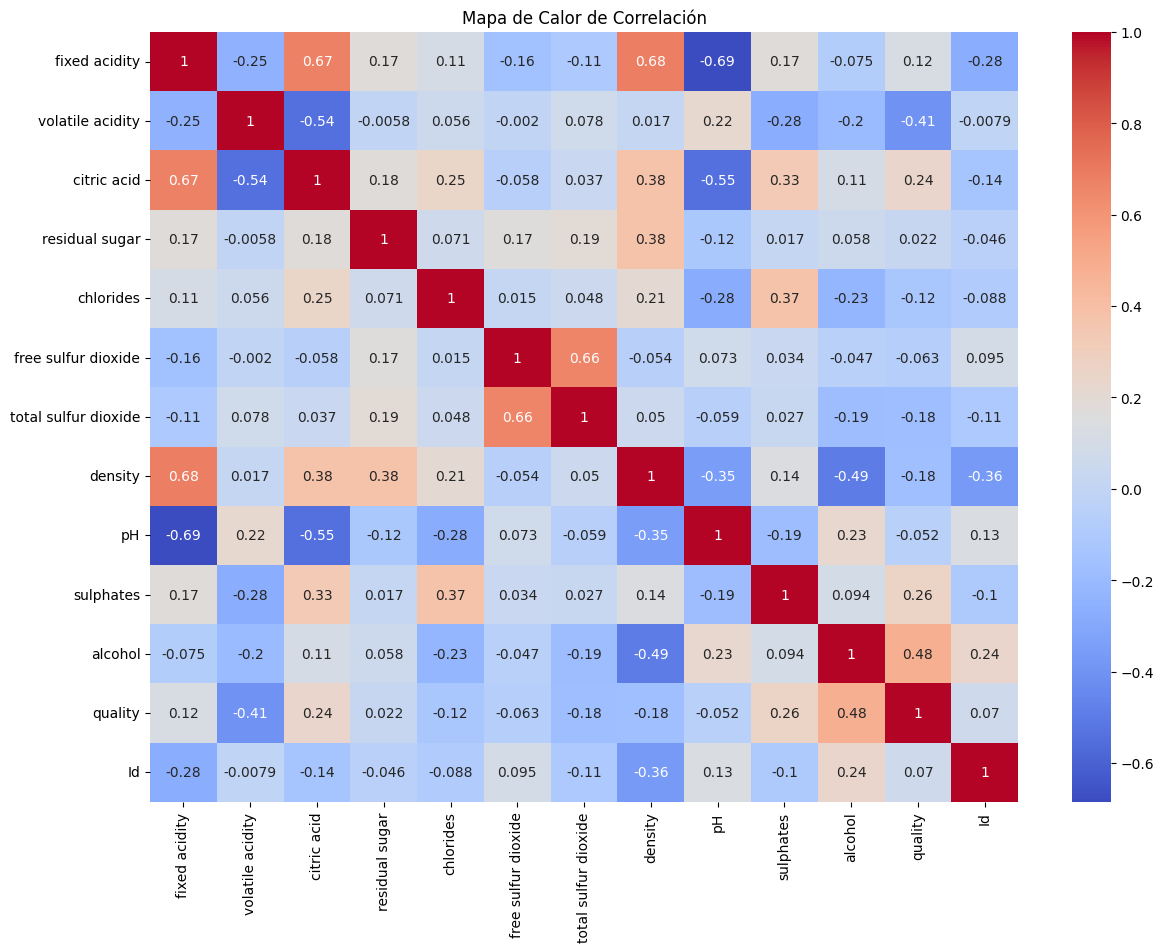

In [29]:
# Mapas de calor Df_1          
# Identificar columnas numéricas 
numeric_columns = df_1.select_dtypes(include=['number']).columns 
# Crear un DataFrame solo con columnas numéricas 
df_1numeric = df_1[numeric_columns] 
# Generar el mapa de calor 
plt.figure(figsize=(14, 10)) 
corr = df_1numeric.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title('Mapa de Calor de Correlación')
plt.show()


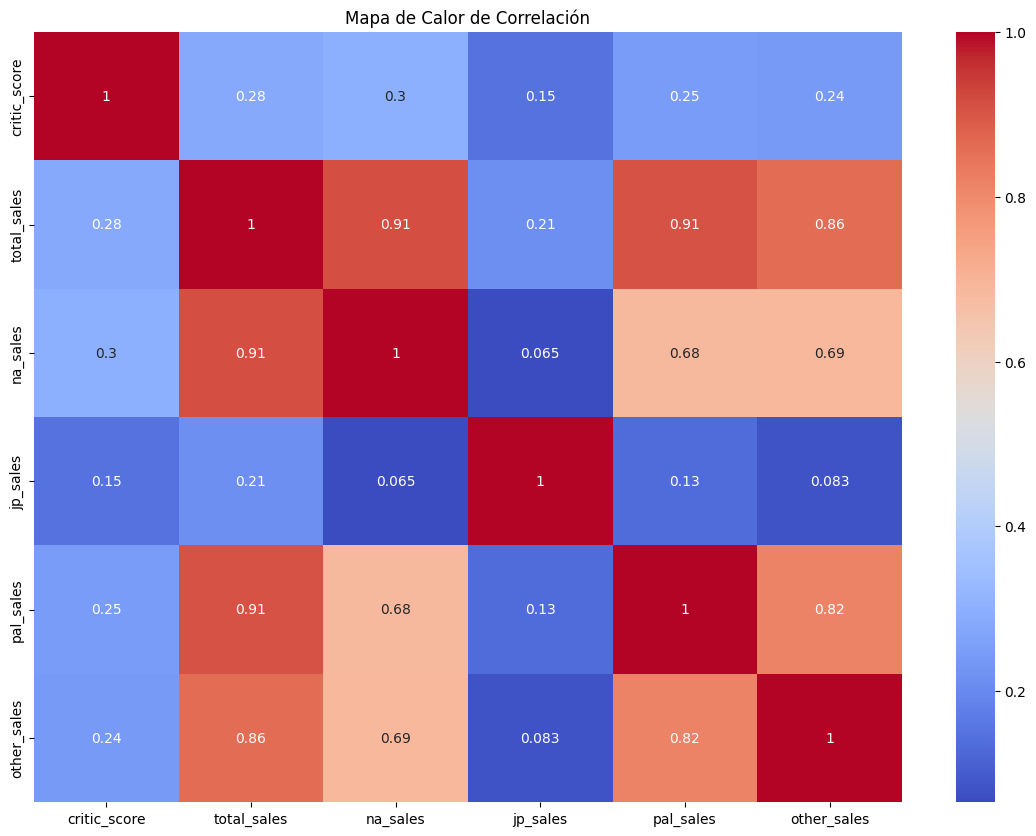

In [30]:
# Mapas de calor Df_2          
# Identificar columnas numéricas 
numeric_columns = df_2.select_dtypes(include=['number']).columns 
# Crear un DataFrame solo con columnas numéricas 
df_2numeric = df_2[numeric_columns] 
# Generar el mapa de calor 
plt.figure(figsize=(14, 10)) 
corr = df_2numeric.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title('Mapa de Calor de Correlación')
plt.show()


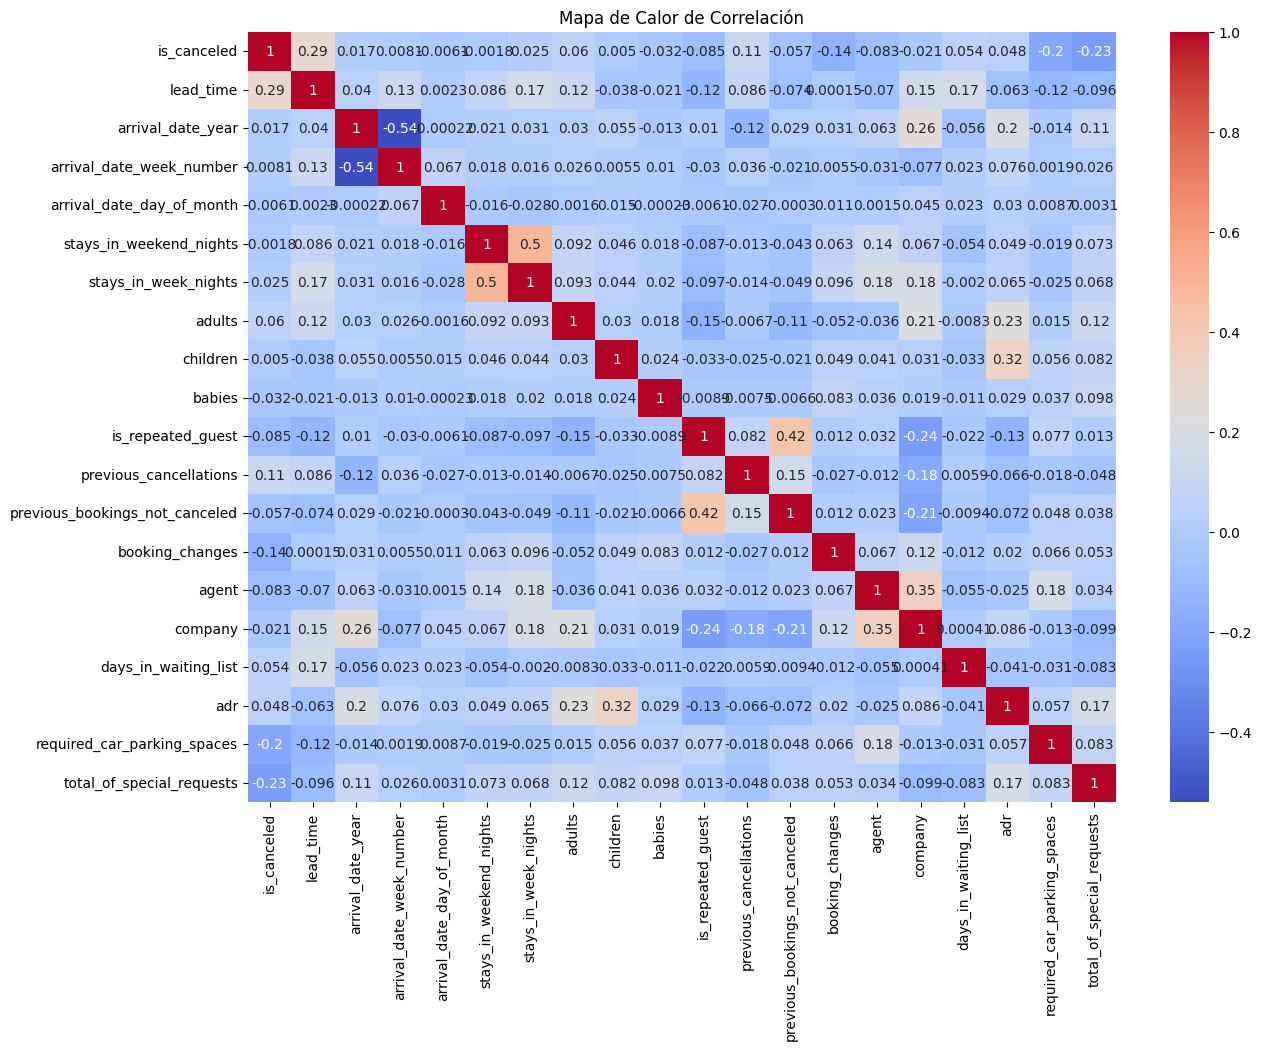

In [31]:
# Mapas de calor Df_3          
# Identificar columnas numéricas 
numeric_columns = df_3.select_dtypes(include=['number']).columns 
# Crear un DataFrame solo con columnas numéricas 
df_3numeric = df_3[numeric_columns] 
# Generar el mapa de calor 
plt.figure(figsize=(14, 10)) 
corr = df_3numeric.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title('Mapa de Calor de Correlación')
plt.show()


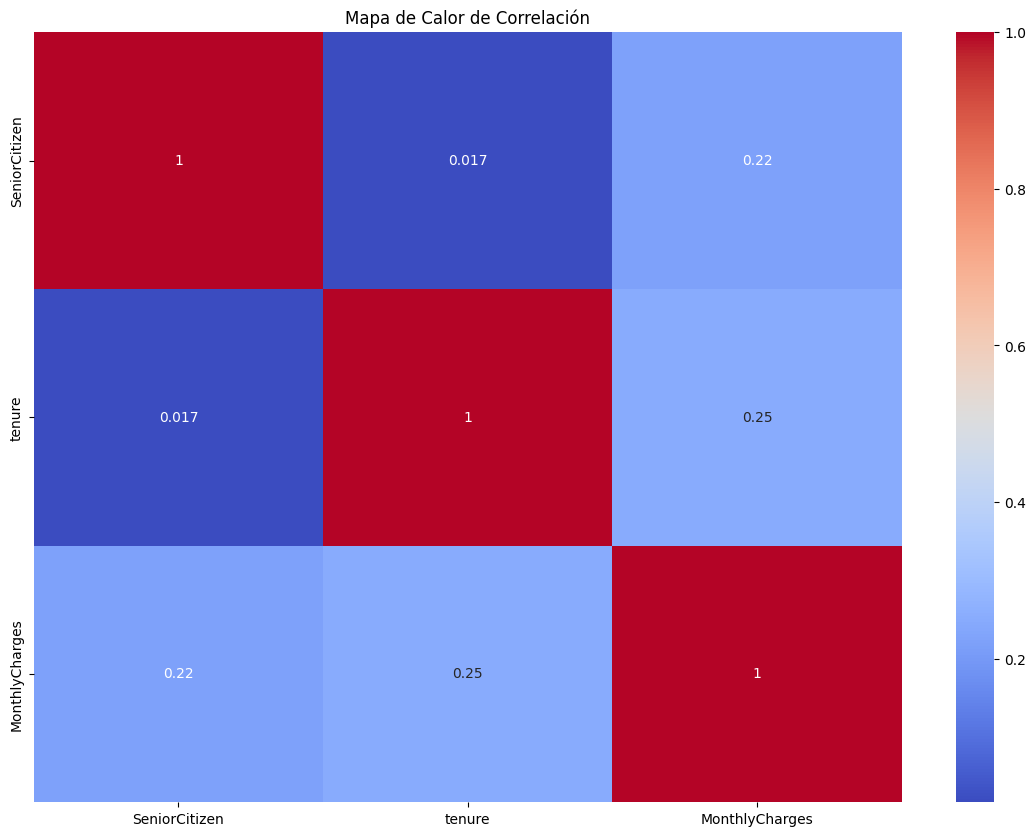

In [32]:
# Mapas de calor Df_4          
# Identificar columnas numéricas 
numeric_columns = df_4.select_dtypes(include=['number']).columns 
# Crear un DataFrame solo con columnas numéricas 
df_4numeric = df_4[numeric_columns] 
# Generar el mapa de calor 
plt.figure(figsize=(14, 10)) 
corr = df_4numeric.corr() 
sns.heatmap(corr, annot=True, cmap='coolwarm') 
plt.title('Mapa de Calor de Correlación')
plt.show()


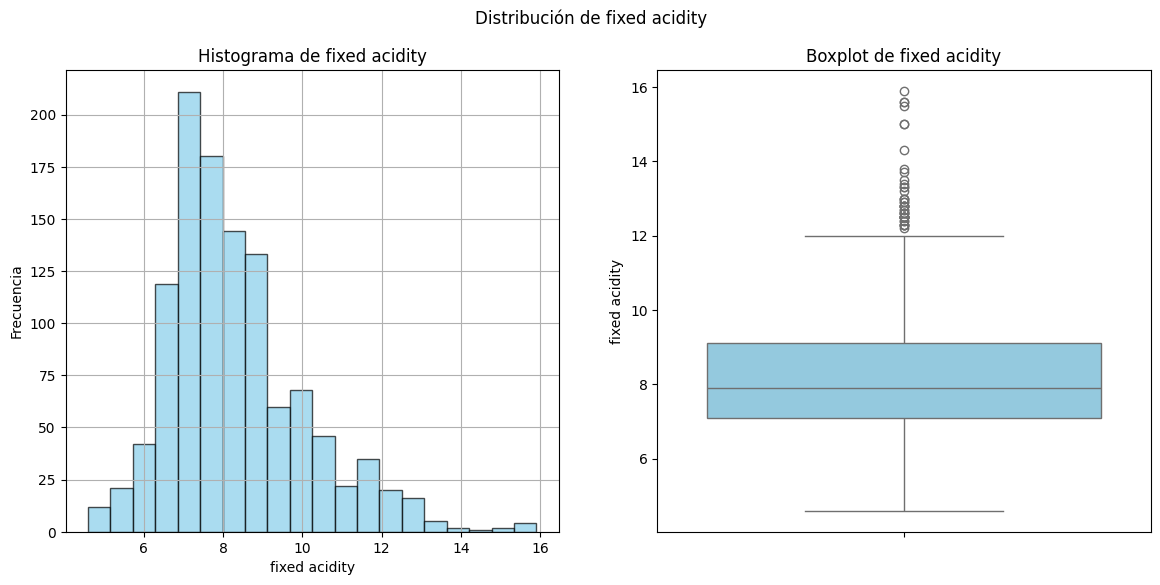

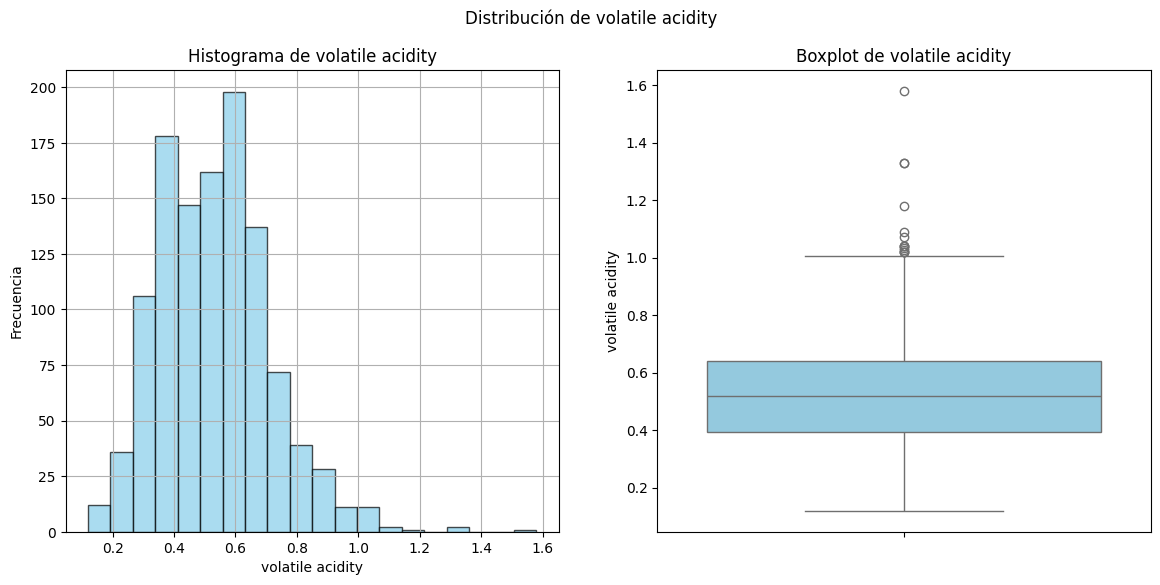

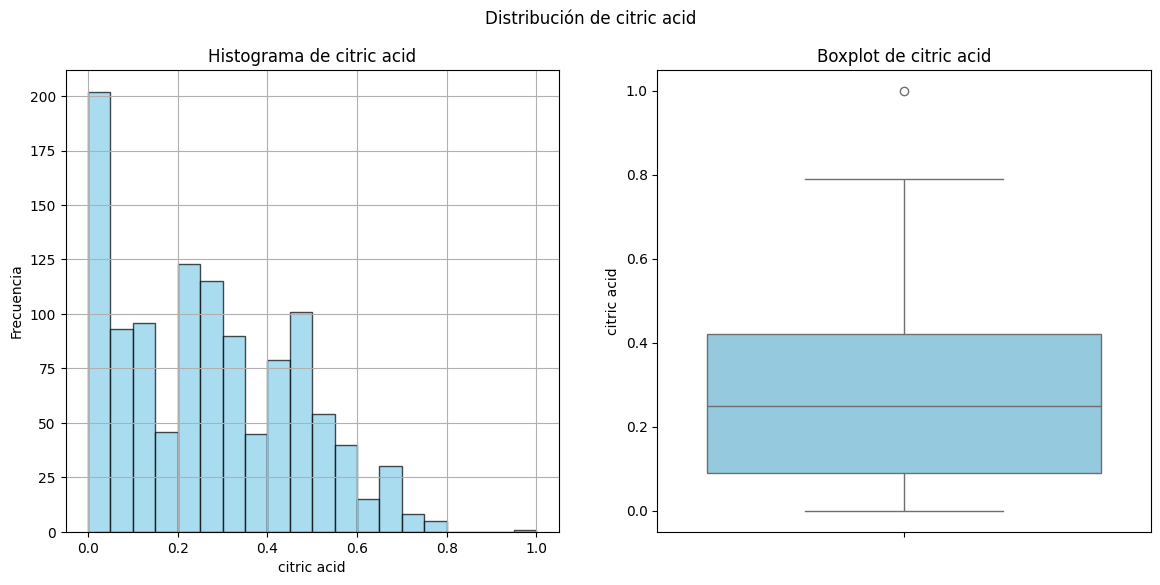

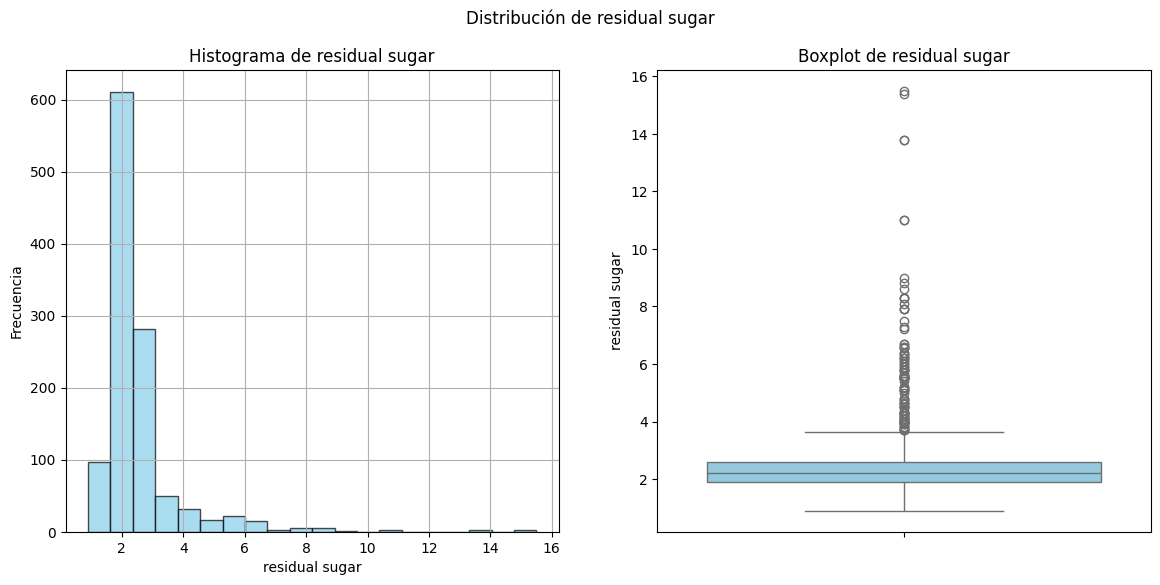

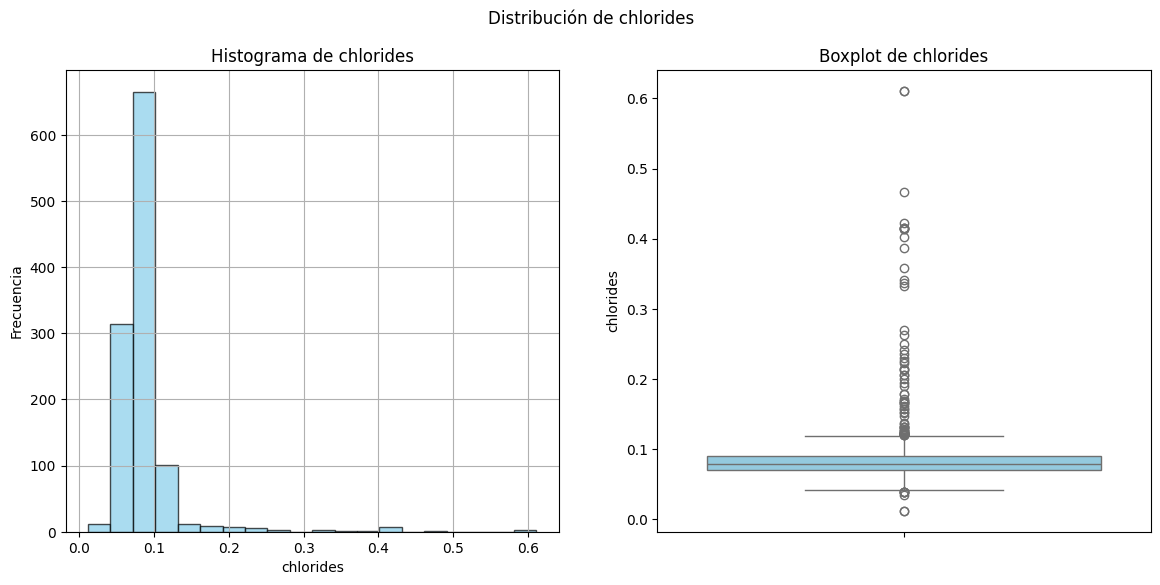

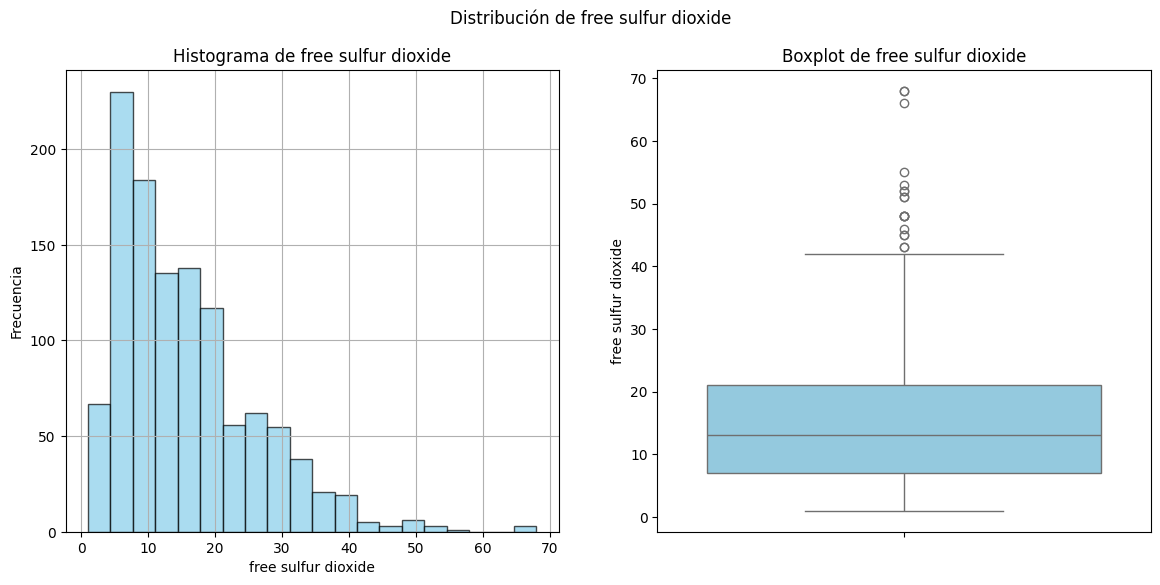

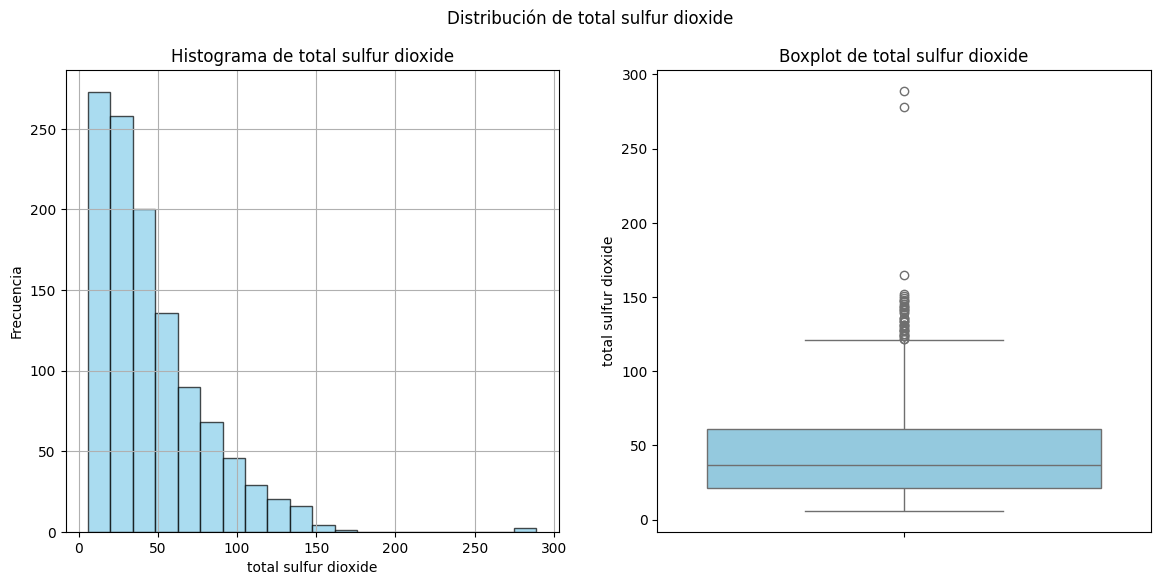

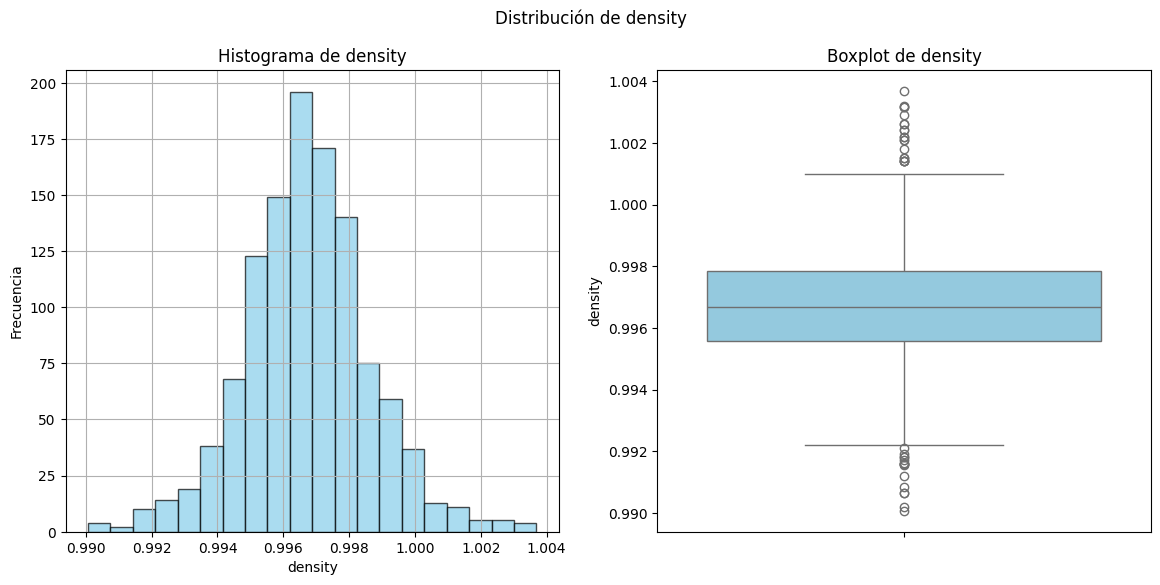

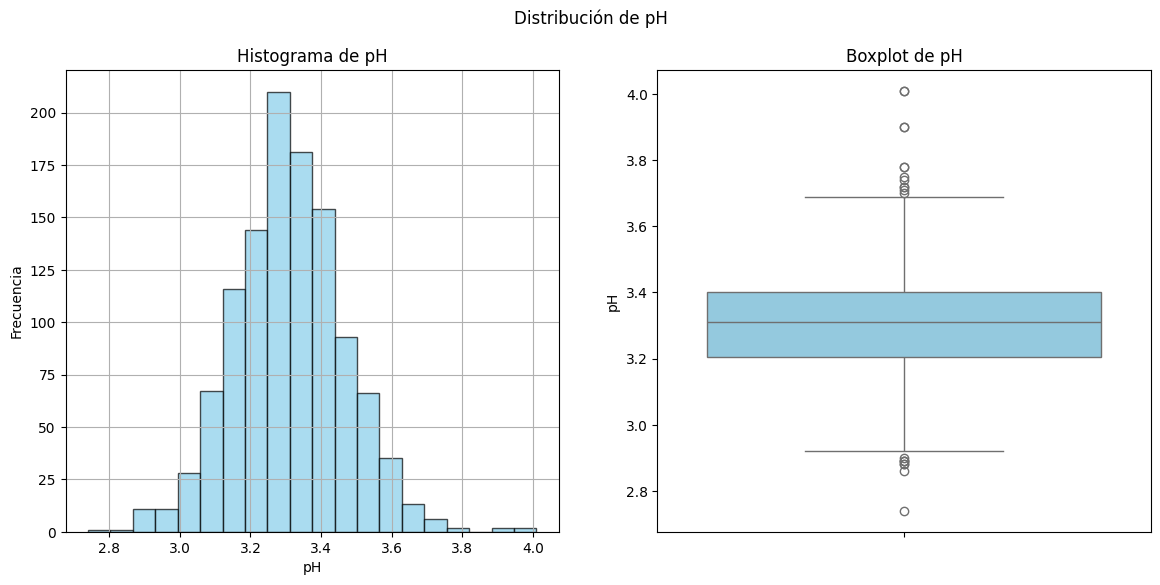

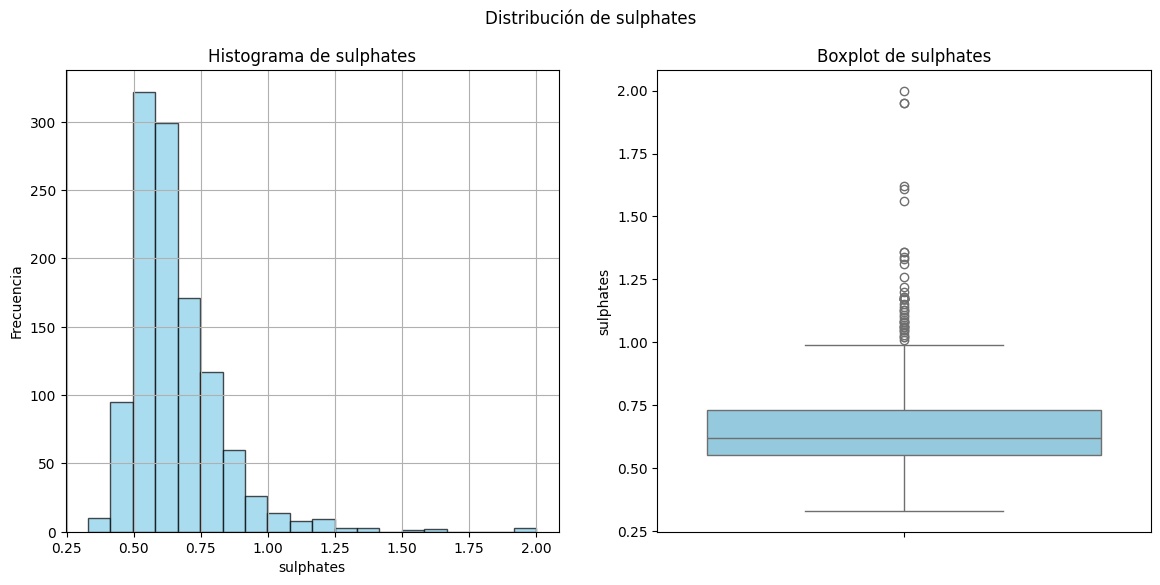

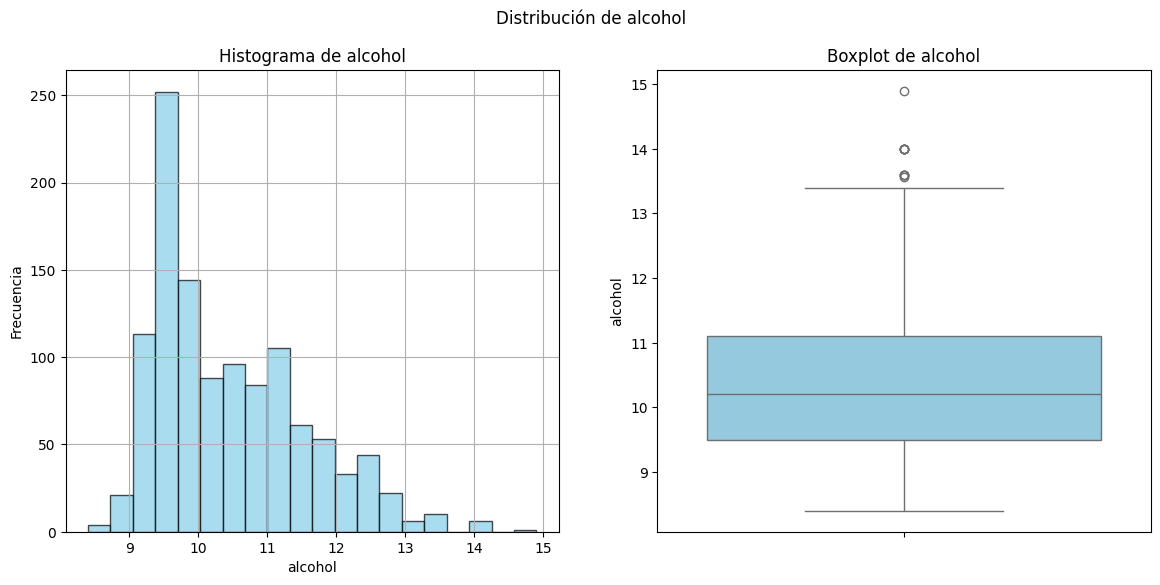

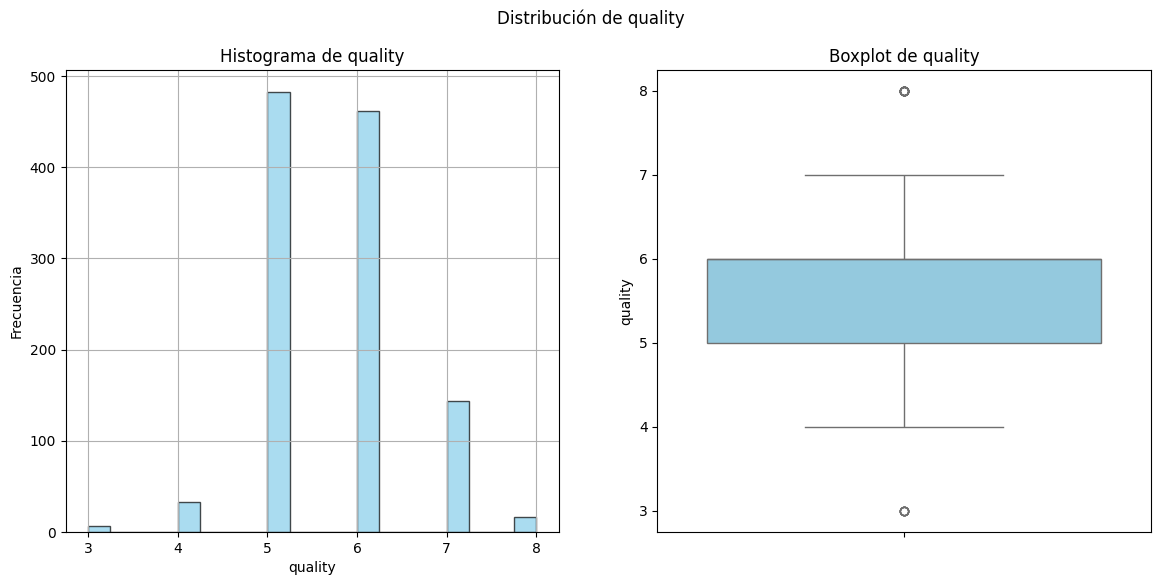

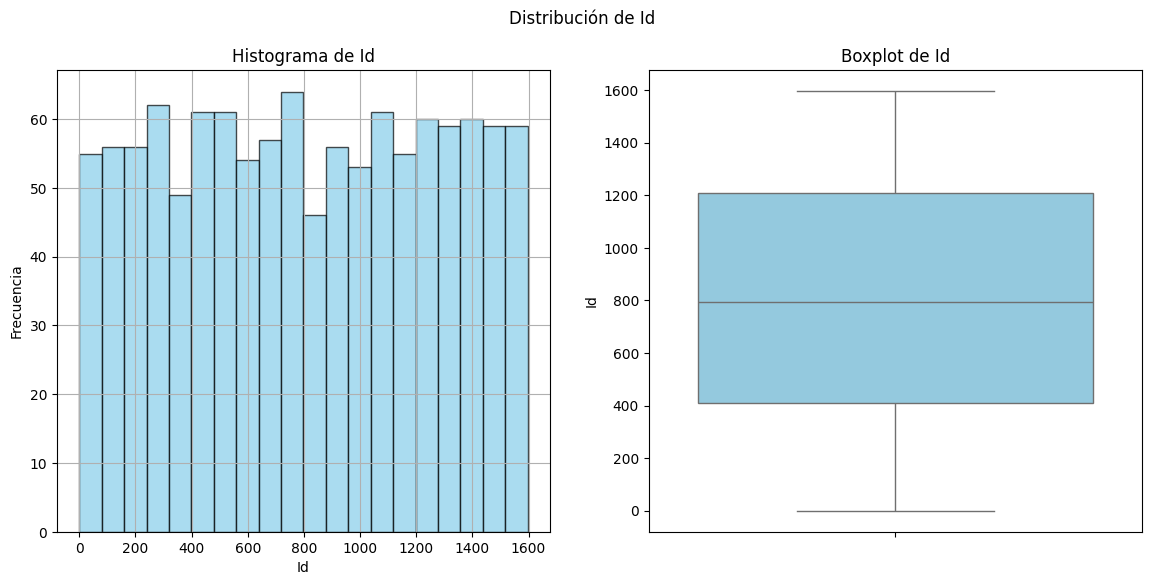

In [37]:
# Historigramas y boxplots para valores numéricos Df_1
variables_n = df_1numeric
for varn in variables_n:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    # Histograma
    ax[0].hist(df_1numeric[varn], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax[0].set_title(f'Histograma de {varn}')
    ax[0].set_xlabel(varn)
    ax[0].set_ylabel('Frecuencia')
    ax[0].grid(True)
    
    # Boxplot
    sns.boxplot(y=df_1numeric[varn], color='skyblue', ax=ax[1])
    ax[1].set_title(f'Boxplot de {varn}')
    ax[1].set_ylabel(varn)
    
    plt.suptitle(f'Distribución de {varn}')
    plt.show()


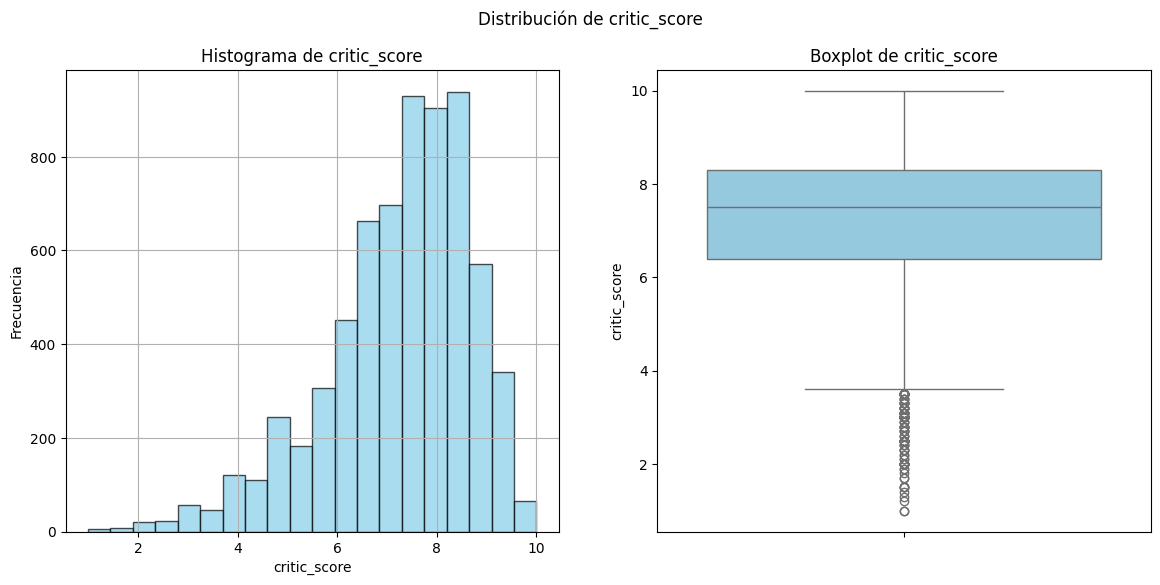

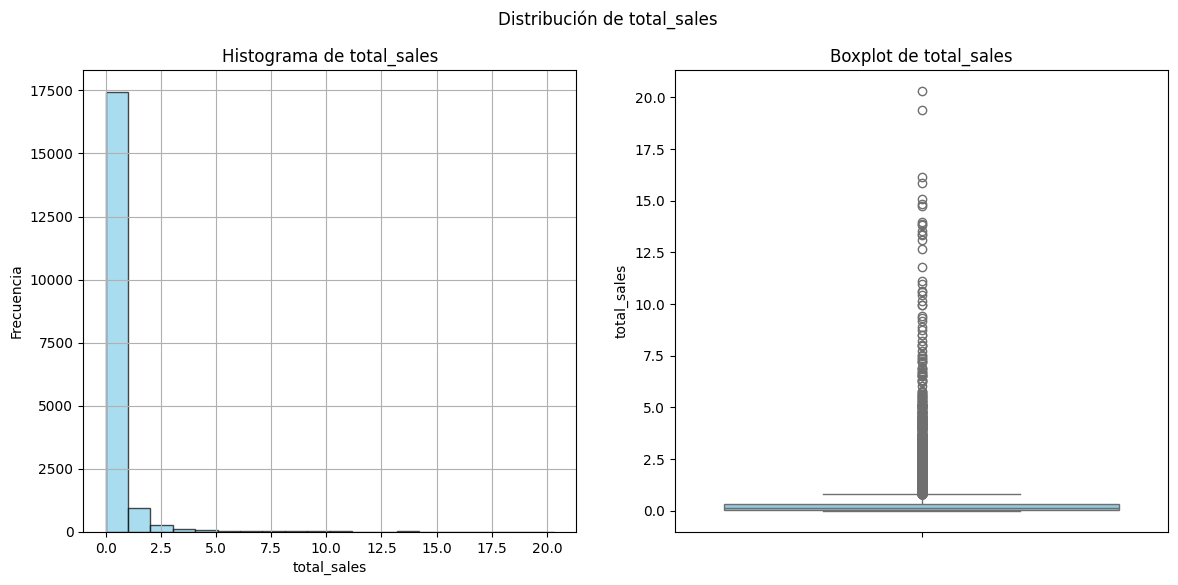

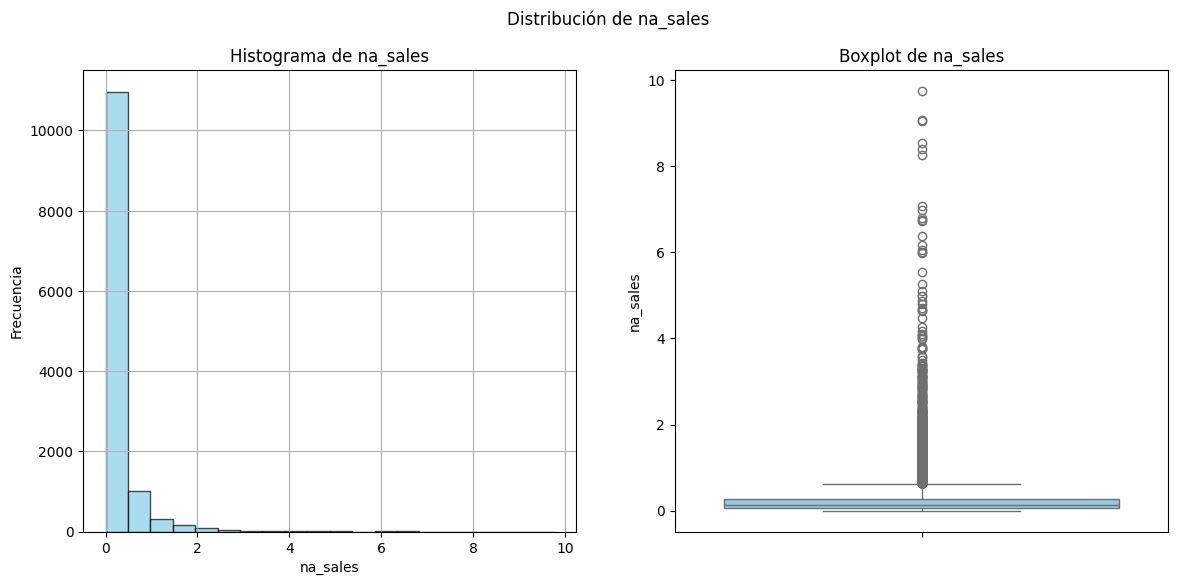

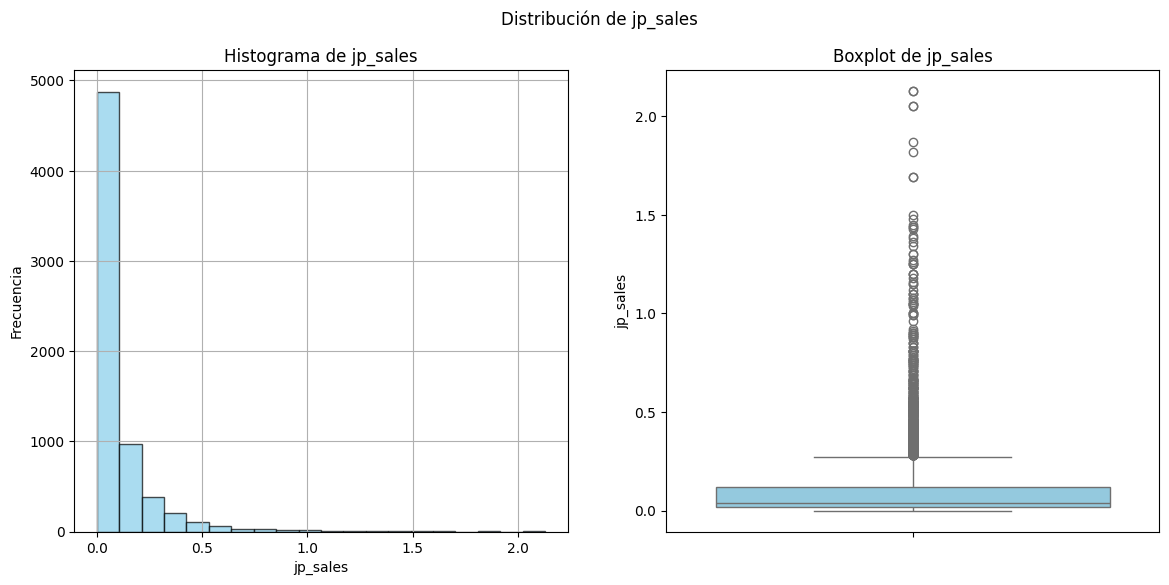

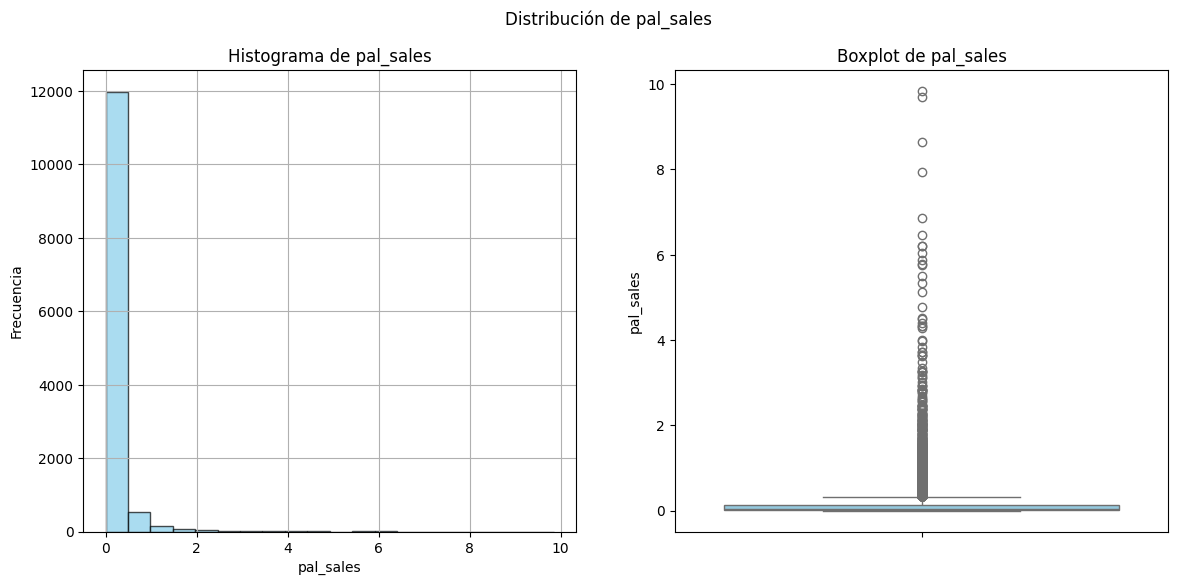

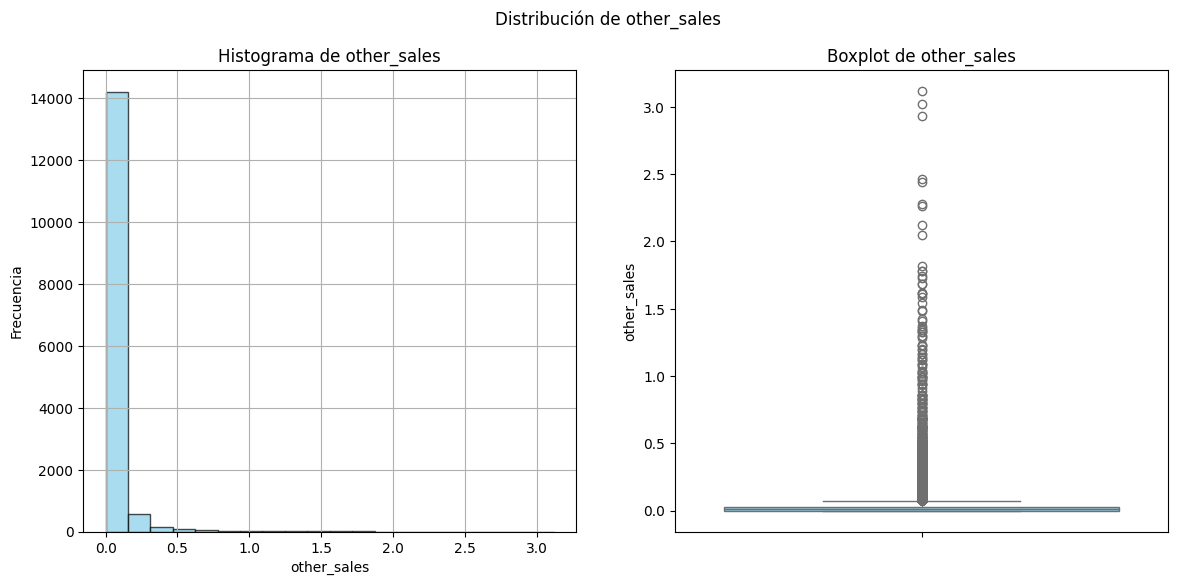

In [38]:
# Historigramas y boxplots para valores numéricos Df_2
variables_n = df_2numeric
for varn in variables_n:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    # Histograma
    ax[0].hist(df_2numeric[varn], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax[0].set_title(f'Histograma de {varn}')
    ax[0].set_xlabel(varn)
    ax[0].set_ylabel('Frecuencia')
    ax[0].grid(True)
    
    # Boxplot
    sns.boxplot(y=df_2numeric[varn], color='skyblue', ax=ax[1])
    ax[1].set_title(f'Boxplot de {varn}')
    ax[1].set_ylabel(varn)
    
    plt.suptitle(f'Distribución de {varn}')
    plt.show()


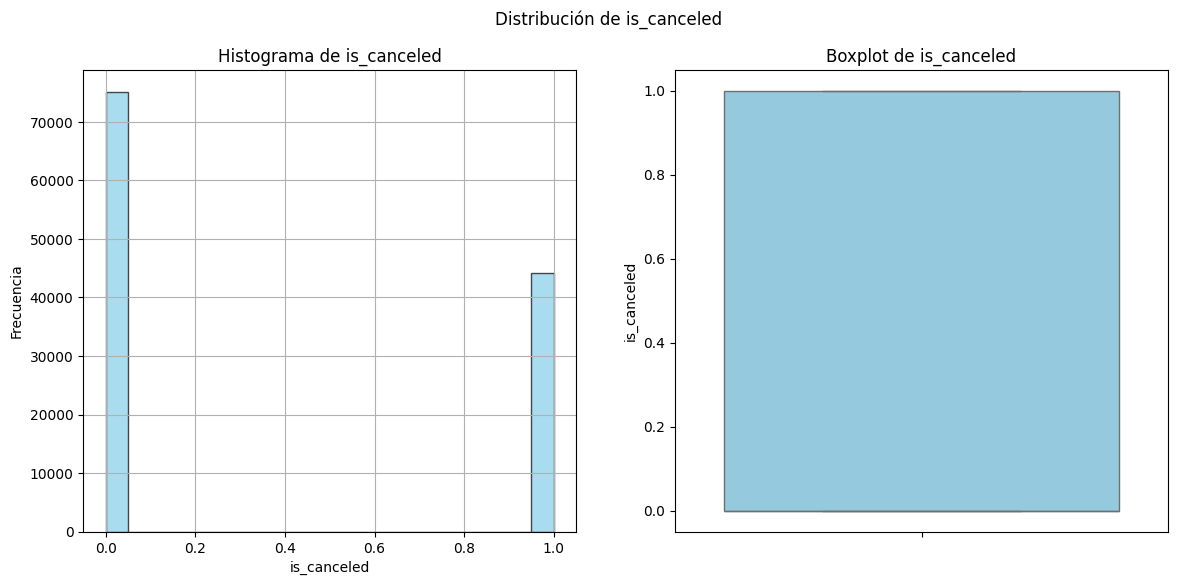

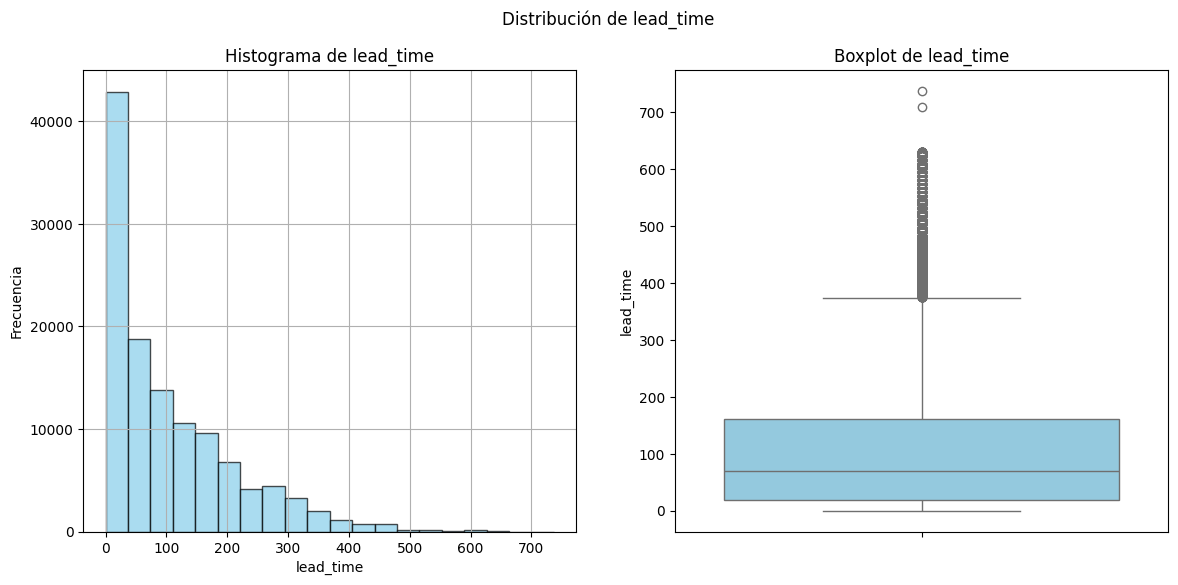

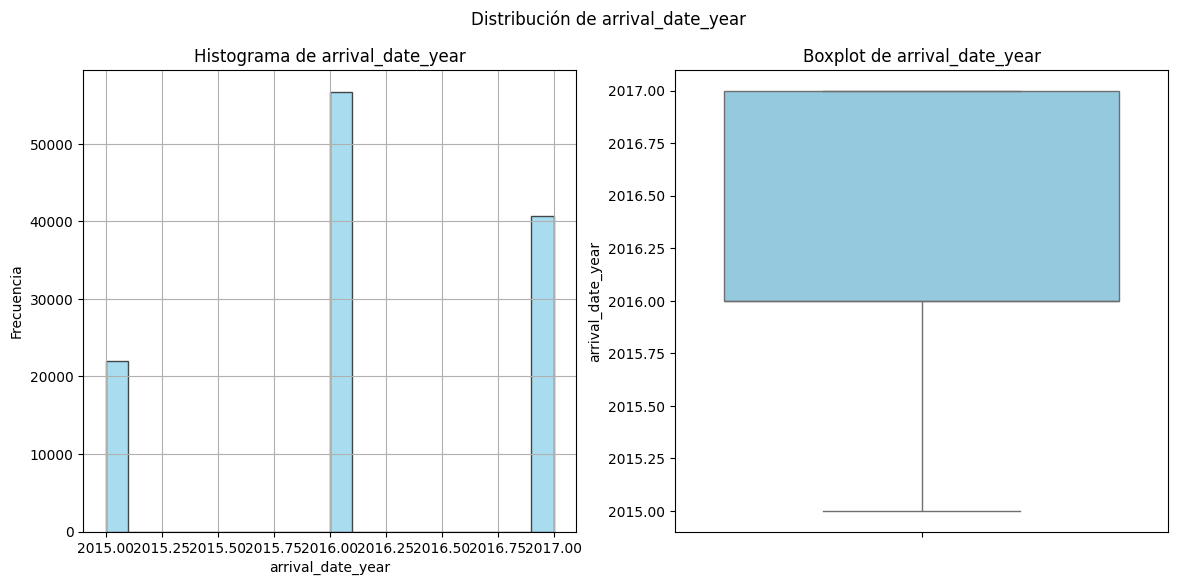

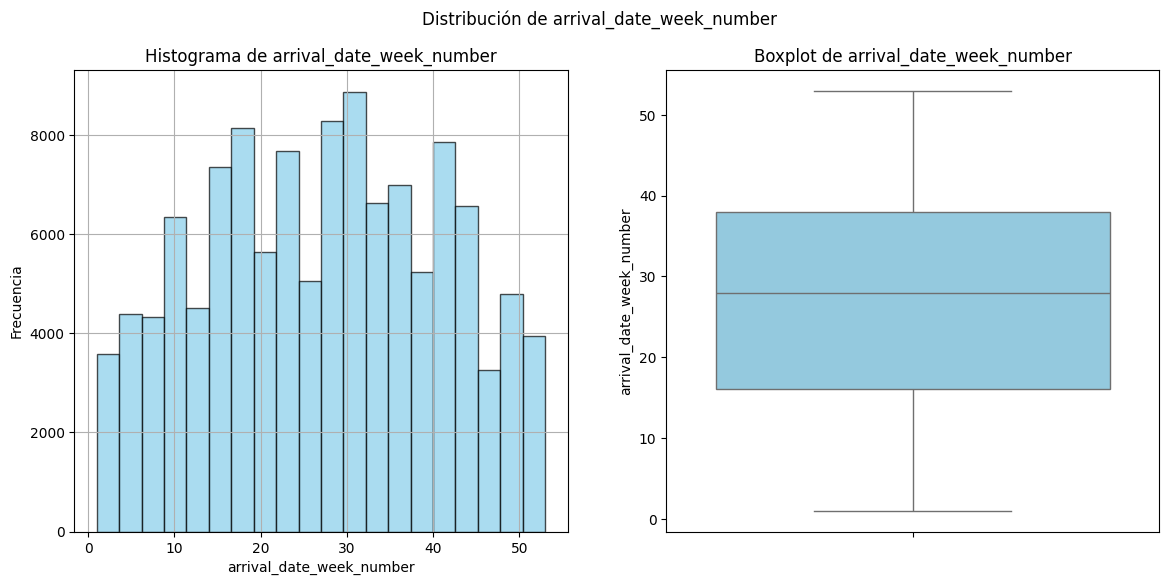

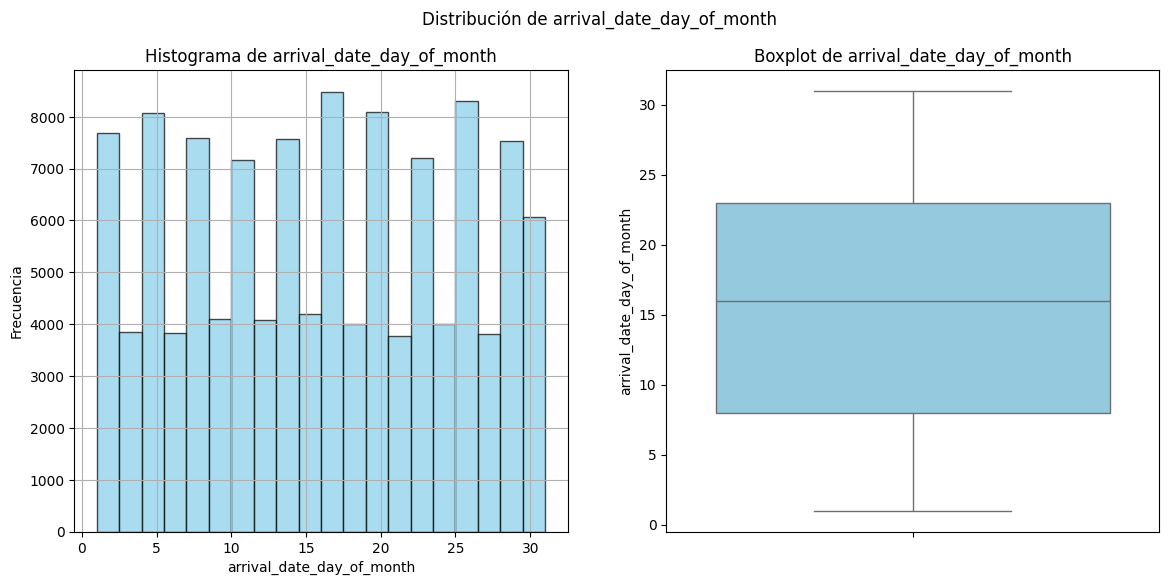

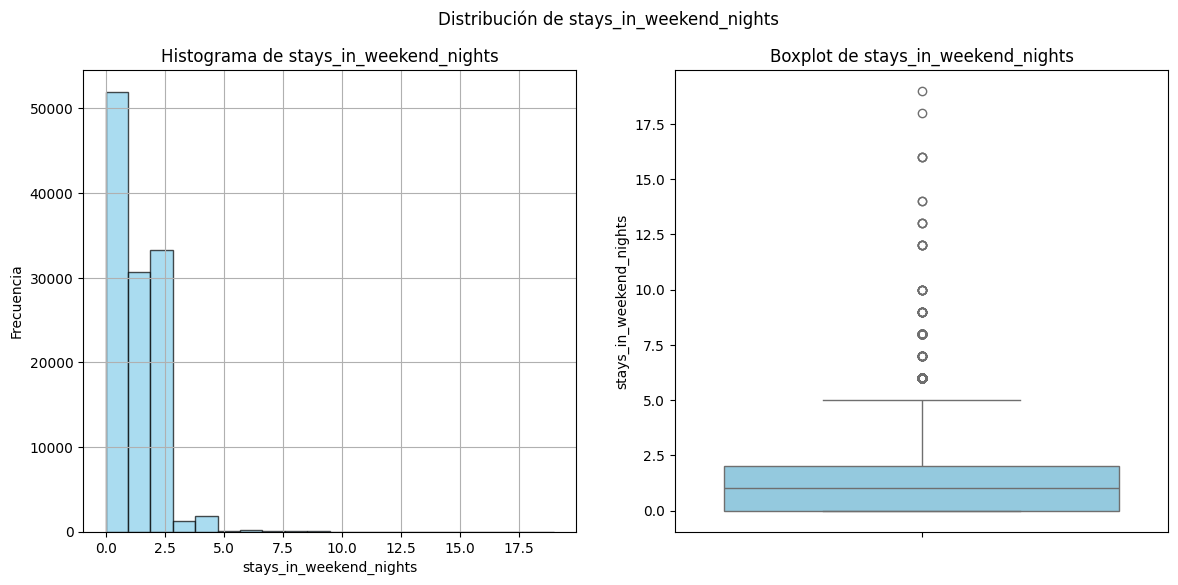

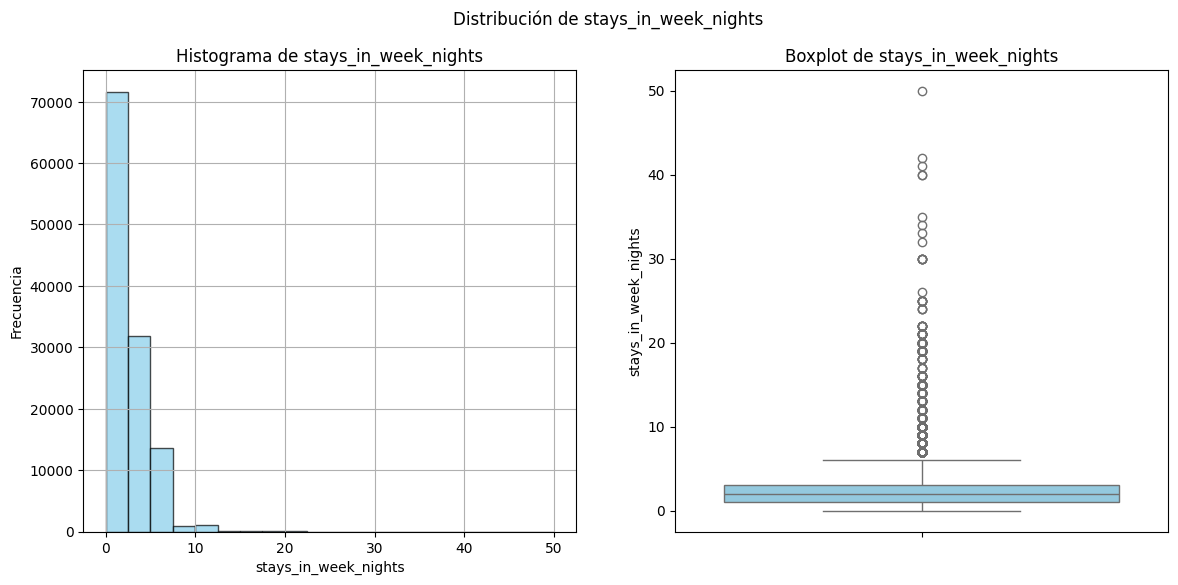

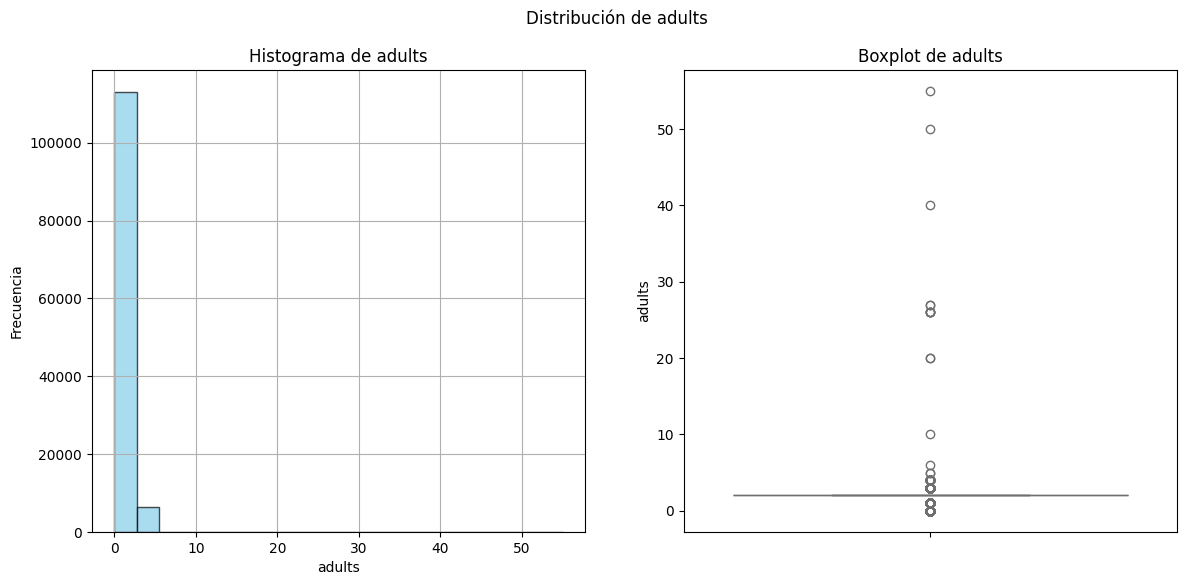

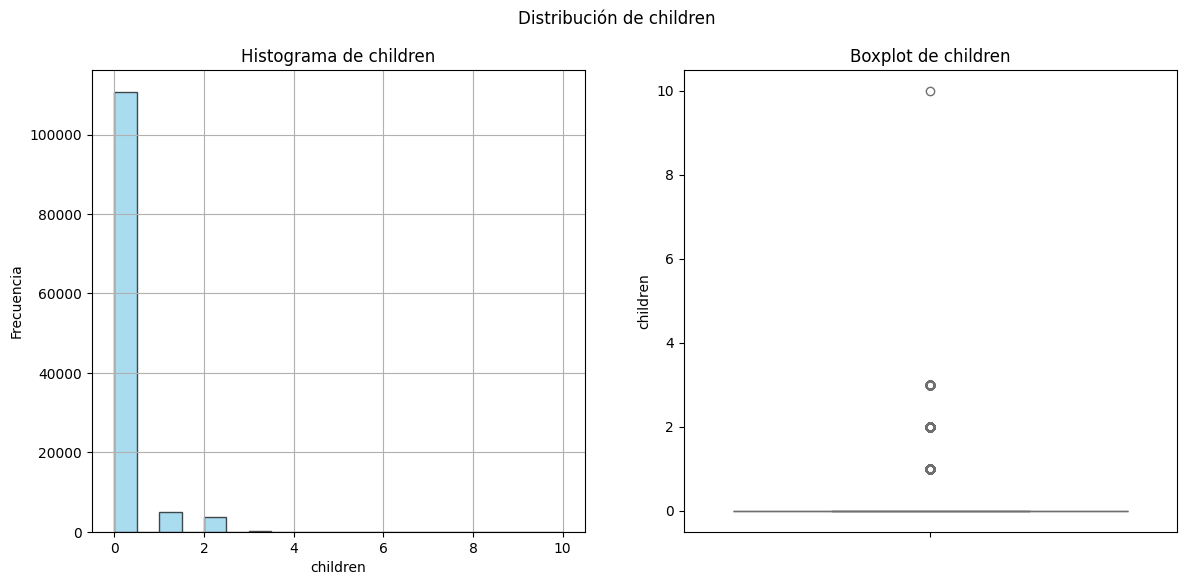

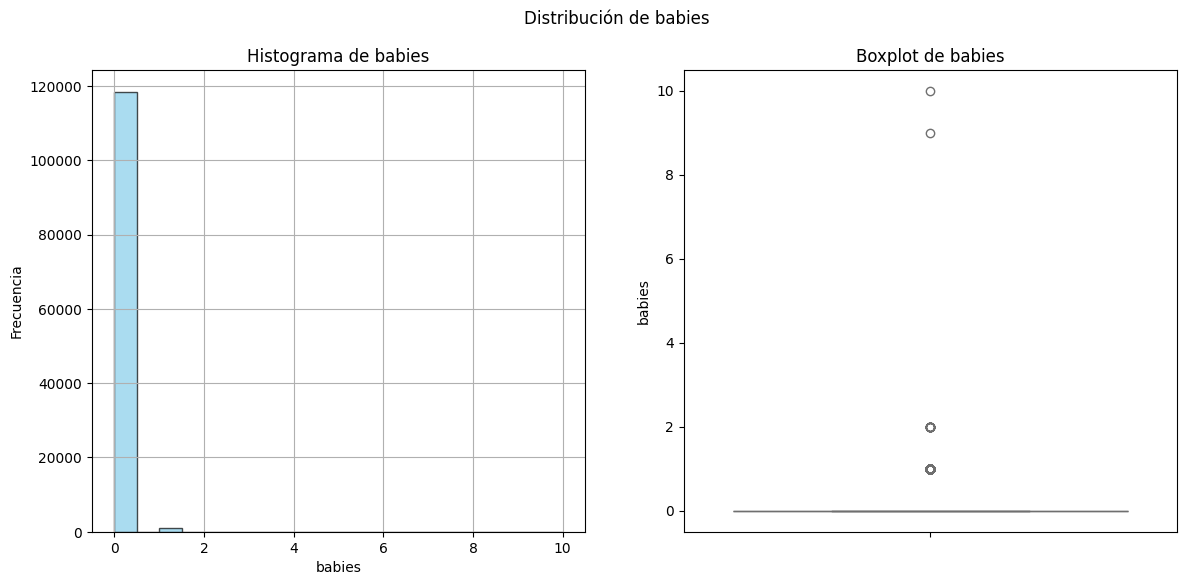

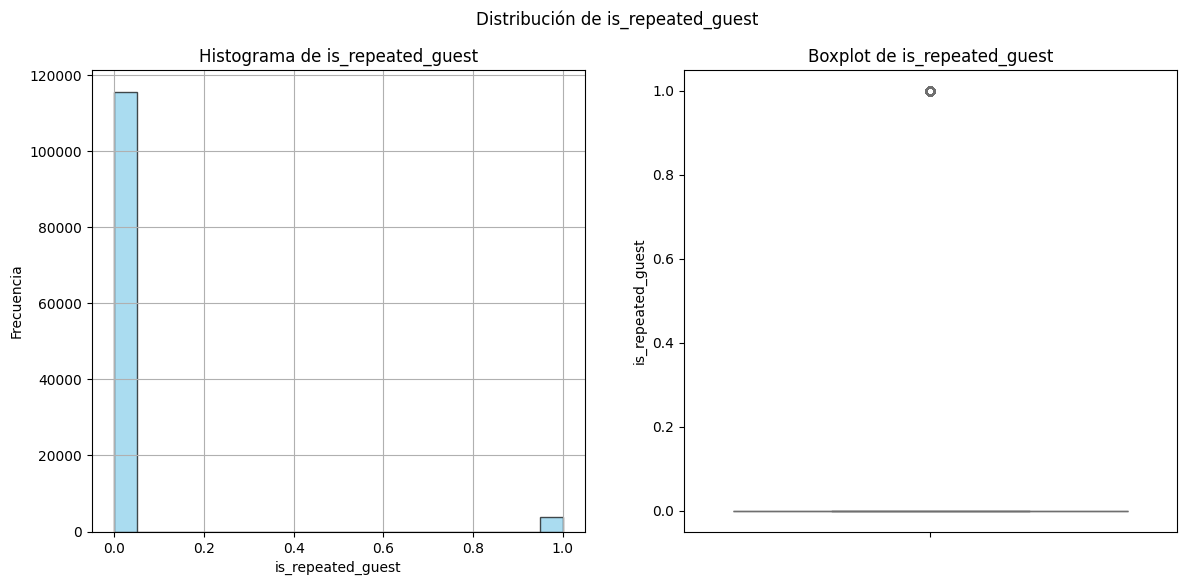

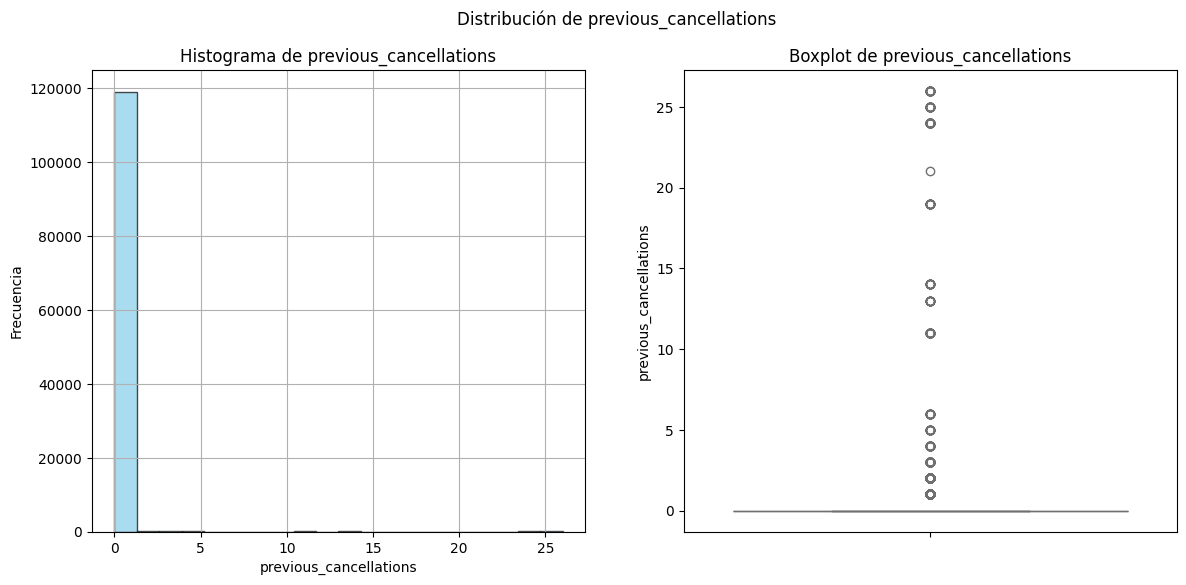

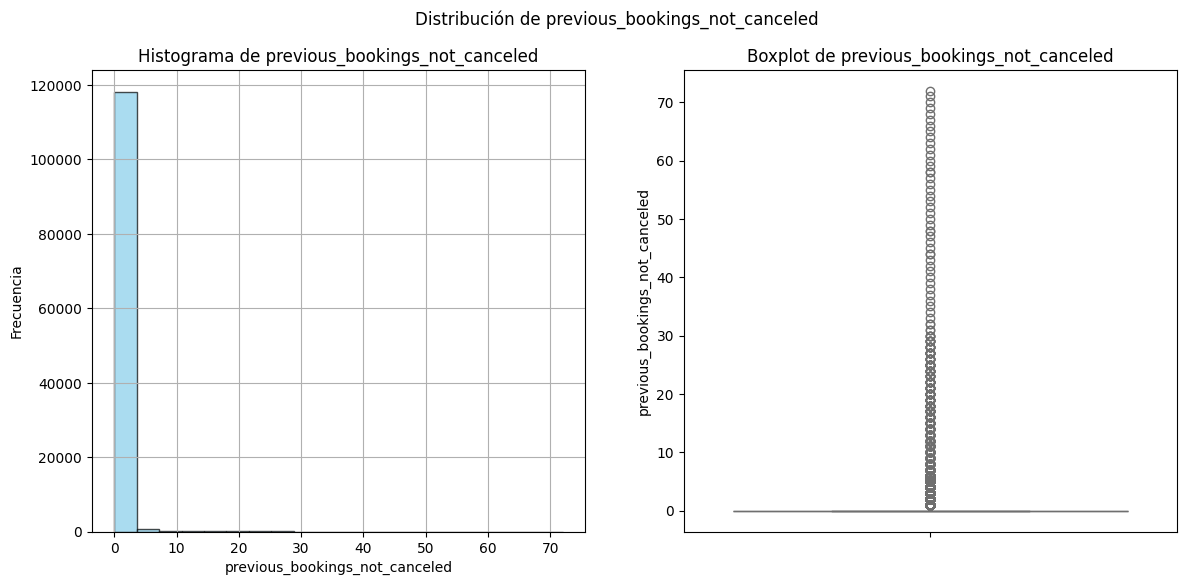

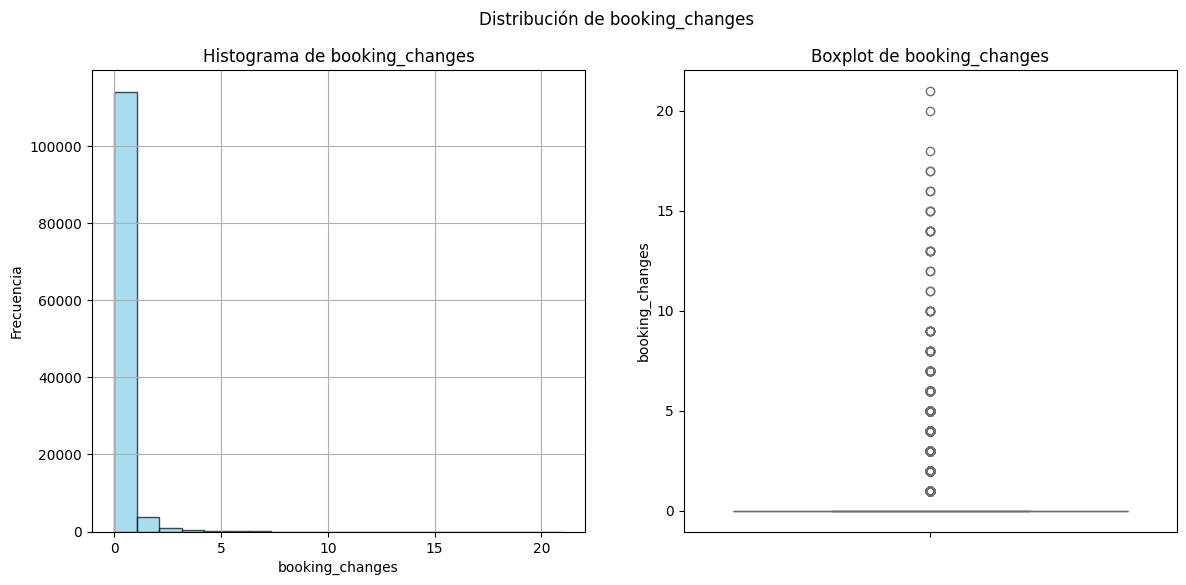

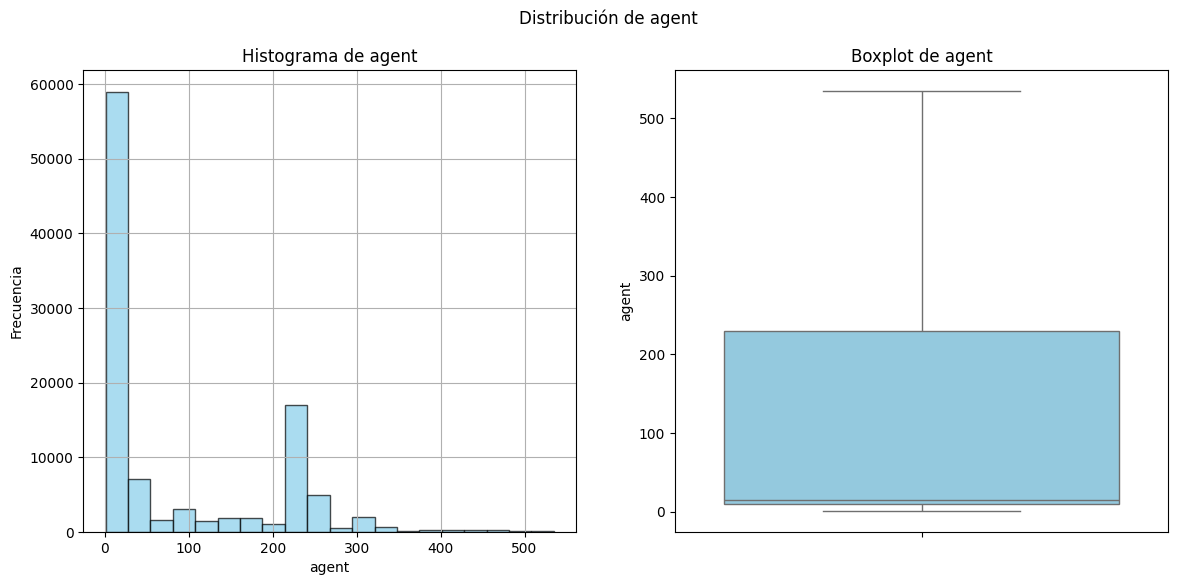

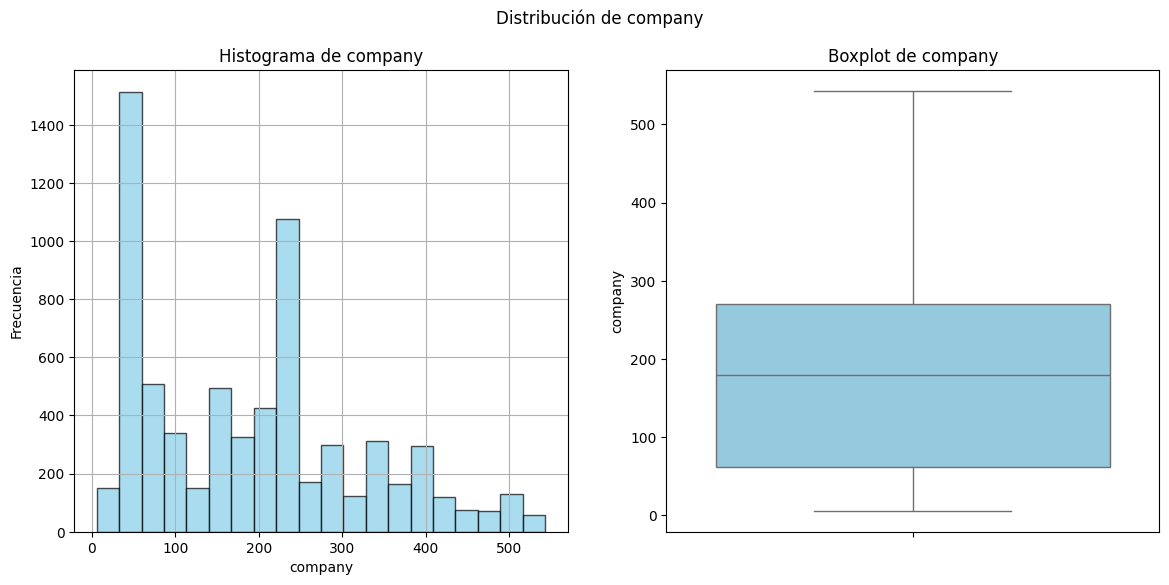

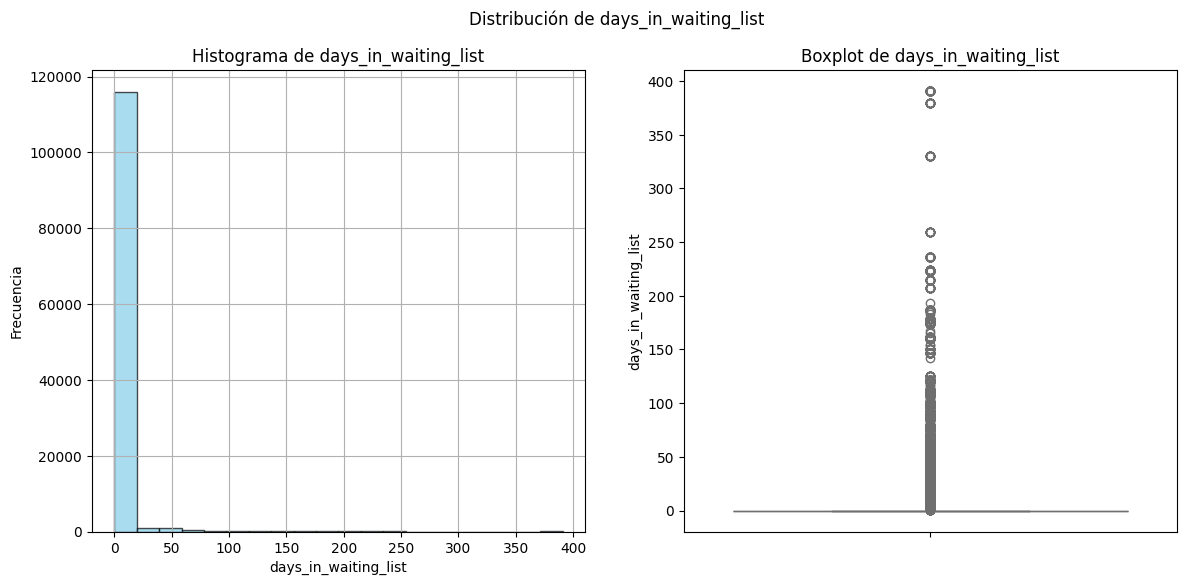

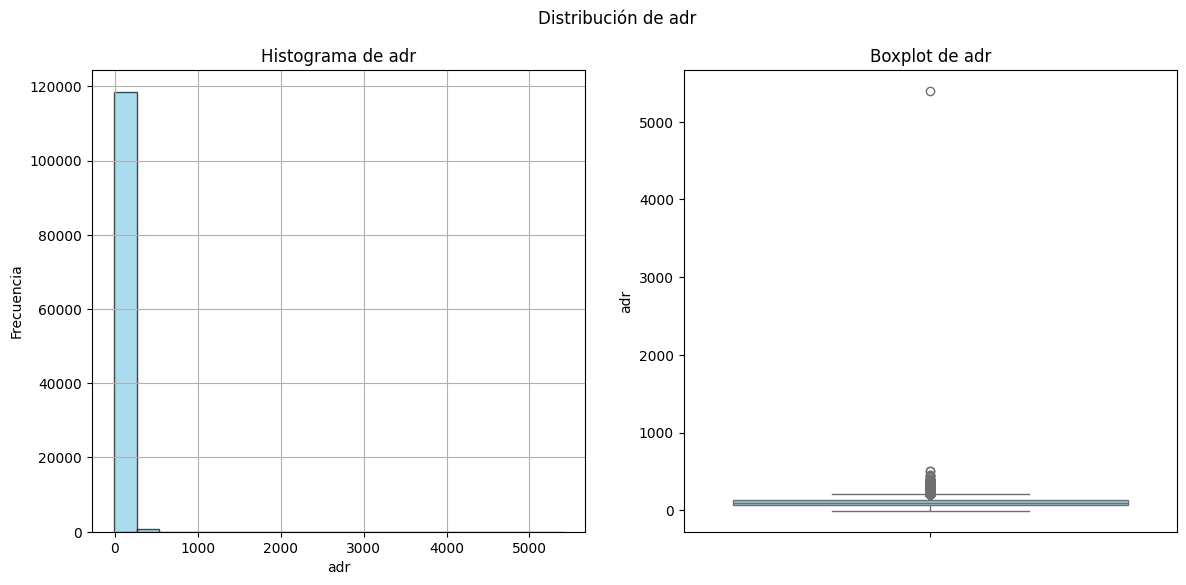

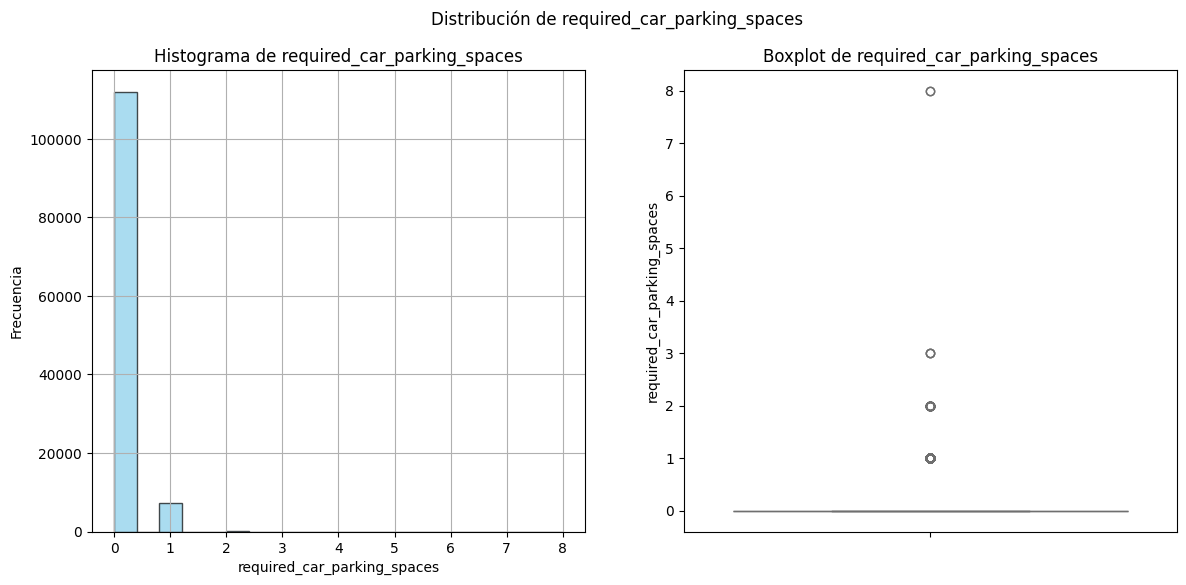

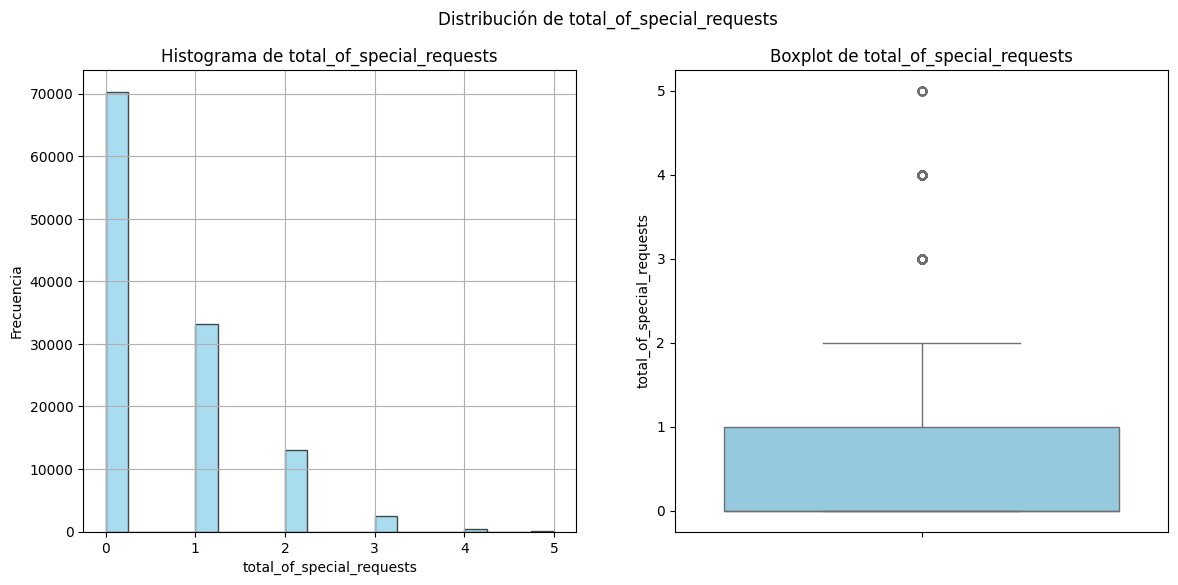

In [39]:
# Historigramas y boxplots para valores numéricos Df_3
variables_n = df_3numeric
for varn in variables_n:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    # Histograma
    ax[0].hist(df_3numeric[varn], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax[0].set_title(f'Histograma de {varn}')
    ax[0].set_xlabel(varn)
    ax[0].set_ylabel('Frecuencia')
    ax[0].grid(True)
    
    # Boxplot
    sns.boxplot(y=df_3numeric[varn], color='skyblue', ax=ax[1])
    ax[1].set_title(f'Boxplot de {varn}')
    ax[1].set_ylabel(varn)
    
    plt.suptitle(f'Distribución de {varn}')
    plt.show()


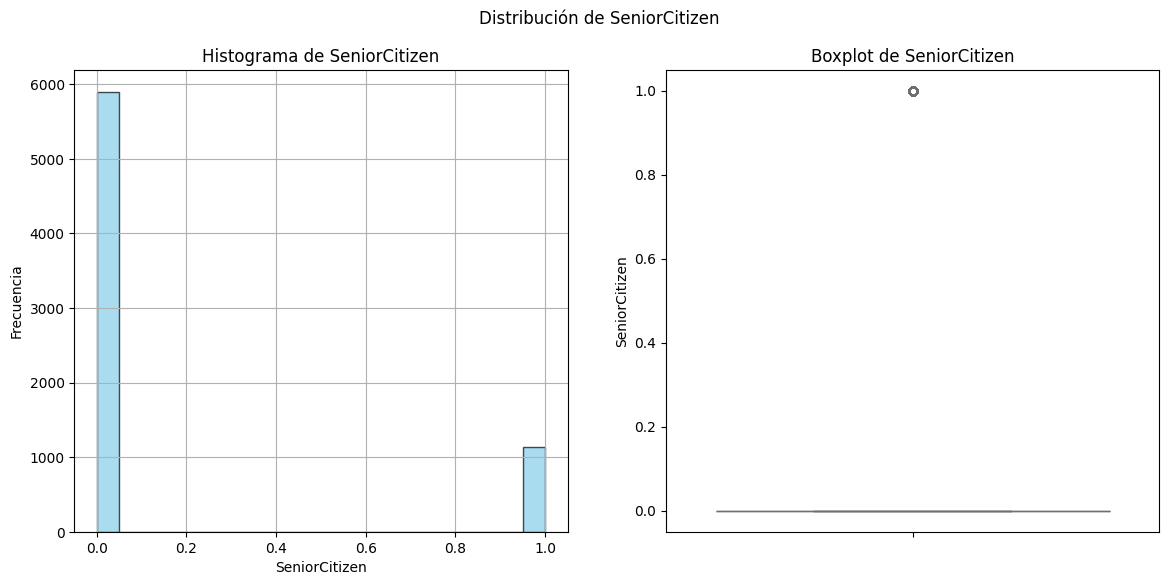

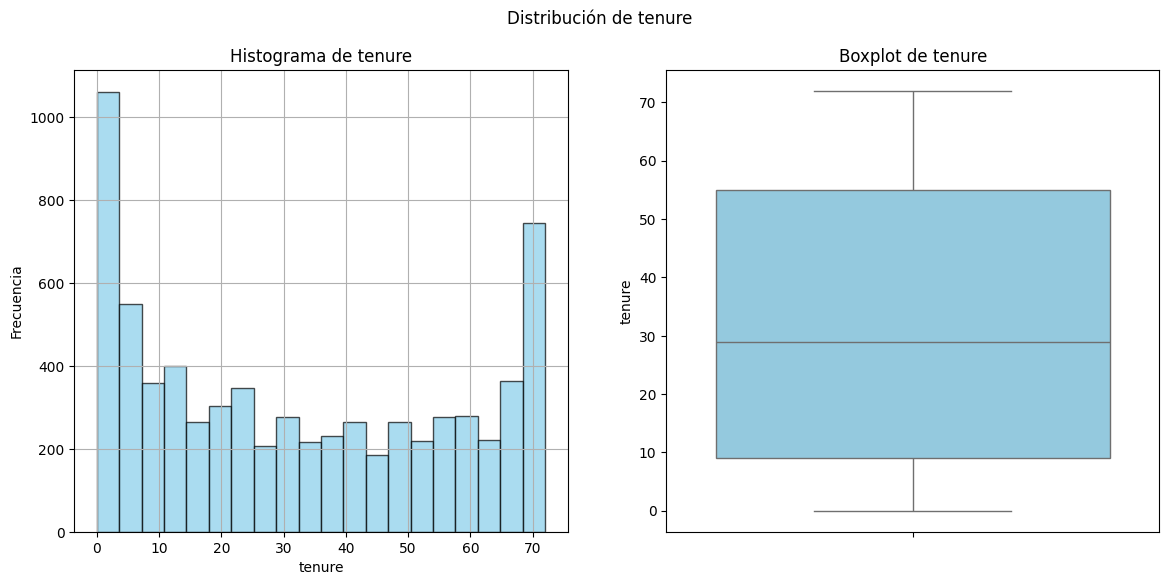

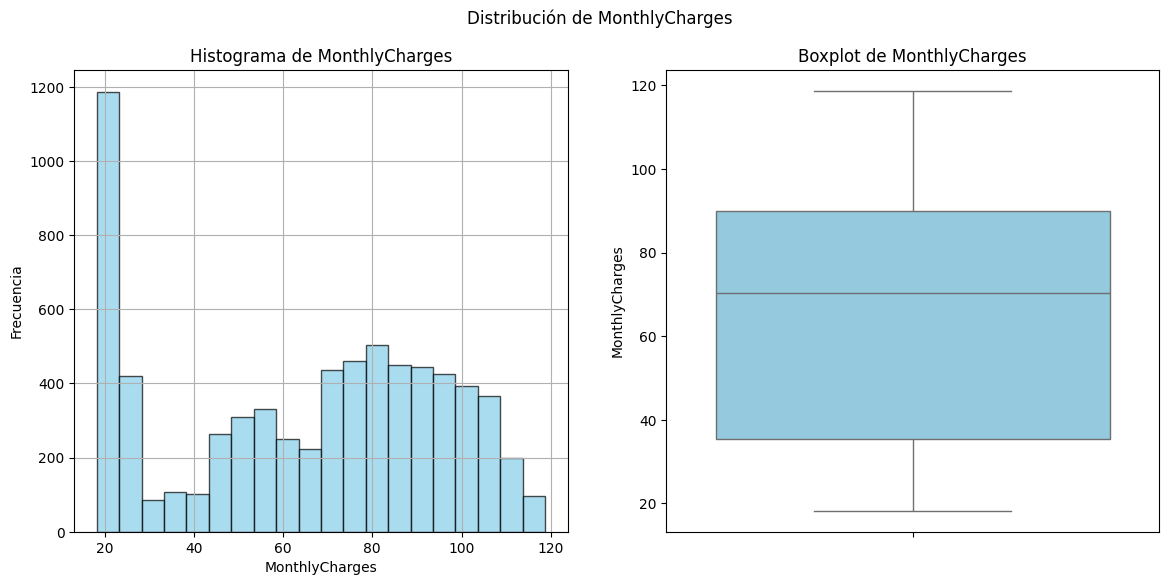

In [40]:
# Historigramas y boxplots para valores numéricos Df_4
variables_n = df_4numeric
for varn in variables_n:
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))
    # Histograma
    ax[0].hist(df_4numeric[varn], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
    ax[0].set_title(f'Histograma de {varn}')
    ax[0].set_xlabel(varn)
    ax[0].set_ylabel('Frecuencia')
    ax[0].grid(True)
    
    # Boxplot
    sns.boxplot(y=df_4numeric[varn], color='skyblue', ax=ax[1])
    ax[1].set_title(f'Boxplot de {varn}')
    ax[1].set_ylabel(varn)
    
    plt.suptitle(f'Distribución de {varn}')
    plt.show()


Se selecciona el dataset 2 para la implementación del modelo de regresión lineal debido a que existen valores faltantes de Total Sales y hay variables numéricas que permitirían realizar una buena predicción.


X Train :  (48012, 13)
X Test  :  (16004, 13)
Y Train :  (48012,)
Y Test  :  (16004,)


c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['img' 'genre' 'publisher' 'developer' 'release_date' 'last_update']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['img' 'genre' 'publisher' 'developer' 'release_date' 'last_update']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


Linear Regression:
Accuracy: 0.8610972256935766
Precision: 0.9933333333333333
Recall: 0.06284268241248418
F1-Score: 0.1182070606902023
ROC-AUC: 0.5463904771471635




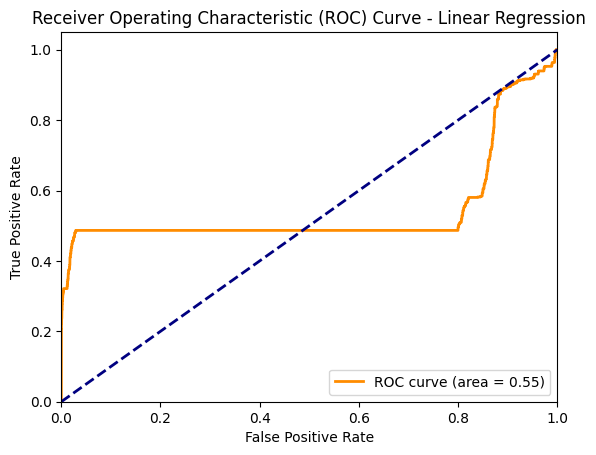

c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['img' 'genre' 'publisher' 'developer' 'release_date' 'last_update']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['img' 'genre' 'publisher' 'developer' 'release_date' 'last_update']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


KNN:
Accuracy: 0.9911897025743565
Precision: 0.9826839826839827
Recall: 0.9574019401096584
F1-Score: 0.9698782311471907
ROC-AUC: 0.9929427481750853




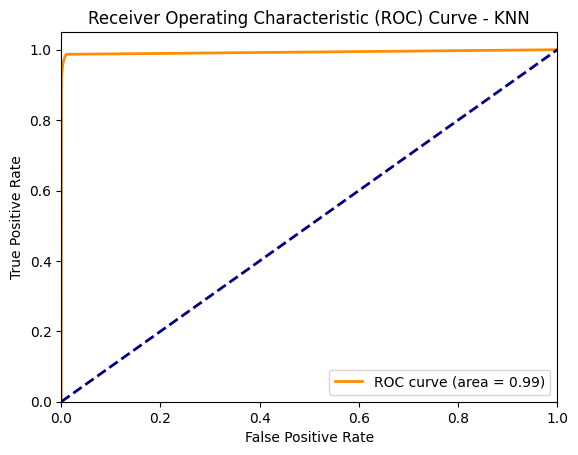

Decision Tree:
Accuracy: 0.9975006248437891
Precision: 0.9936467598475223
Recall: 0.9894559257697174
F1-Score: 0.9915469146238377
ROC-AUC: 0.9955329723634655




c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['img' 'genre' 'publisher' 'developer' 'release_date' 'last_update']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\edamv\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\impute\_base.py:598: UserWarning: Skipping features without any observed values: ['img' 'genre' 'publisher' 'developer' 'release_date' 'last_update']. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


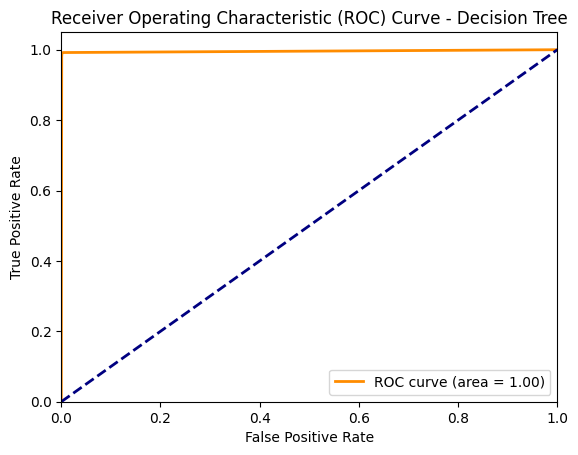

Modelo: Linear Regression
Accuracy: 0.8610972256935766
Precision: 0.9933333333333333
Recall: 0.06284268241248418
F1-Score: 0.1182070606902023
ROC-AUC: 0.5463904771471635


Modelo: KNN
Accuracy: 0.9911897025743565
Precision: 0.9826839826839827
Recall: 0.9574019401096584
F1-Score: 0.9698782311471907
ROC-AUC: 0.9929427481750853


Modelo: Decision Tree
Accuracy: 0.9975006248437891
Precision: 0.9936467598475223
Recall: 0.9894559257697174
F1-Score: 0.9915469146238377
ROC-AUC: 0.9955329723634655


El mejor modelo es: Decision Tree basado en ROC-AUC


In [44]:
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt

# Suponiendo que df_final ya está cargado y preprocesado en el entorno
#df = df_final.copy()

# Convertir columnas de tipo 'Timestamp' a formato numérico (segundos desde una fecha de referencia)
for col in df_2.select_dtypes(include=['datetime64', 'datetime']):
    df_2[col] = df_2[col].apply(lambda x: x.timestamp() if pd.notnull(x) else np.nan)

# Manejar valores no numéricos en columnas numéricas
for col in df_2.select_dtypes(include=['object']).columns:
    df_2[col] = pd.to_numeric(df_2[col], errors='coerce')

# Verificar y manejar valores infinitos en el DataFrame
df_2.replace([np.inf, -np.inf], np.nan, inplace=True)

# Convertir la variable objetivo en categorías binarios
threshold = df_2["total_sales"].median()
df_2["total_sales_class"] = (df_2["total_sales"] >= threshold).astype(int)

# Dividir los datos en características (X) y etiqueta (y)
X = df_2.drop(columns=["total_sales", "total_sales_class"])
y = df_2["total_sales_class"]

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

# Preprocesamiento de características numéricas y categóricas
num_features = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_features = X_train.select_dtypes(include=['object']).columns

# Crear pipeline de preprocesamiento
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_features),
        ('cat', cat_transformer, cat_features)
    ],
    remainder='passthrough'
)

# Crear pipeline completo y ajustar para cada modelo
models = {
    'Linear Regression': LinearRegression(),
    'KNN': KNeighborsRegressor(n_neighbors=5),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    #'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    #'XGBoost': xgb.XGBRegressor(n_estimators=100, random_state=42),
    #'LightGBM': lgb.LGBMRegressor(n_estimators=100, random_state=42)
}

results = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Ajustar el modelo
    pipeline.fit(X_train, y_train)
    
    # Predicción y evaluación
    y_pred_prob = pipeline.predict(X_test)
    y_pred_class = (y_pred_prob >= 0.5).astype(int)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred_class)
    precision = precision_score(y_test, y_pred_class)
    recall = recall_score(y_test, y_pred_class)
    f1 = f1_score(y_test, y_pred_class)
    roc_auc = roc_auc_score(y_test, y_pred_prob)
    
    # Guardar resultados
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'ROC-AUC': roc_auc
    }
    
    # Imprimir resultados
    print(f"{model_name}:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print(f"ROC-AUC: {roc_auc}")
    print("\n")
    
    # Crear y visualizar la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# Mostrar resultados
for model_name, metrics in results.items():
    print(f"Modelo: {model_name}")
    for metric_name, value in metrics.items():
        print(f"{metric_name}: {value}")
    print("\n")

# Seleccionar el mejor modelo basado en ROC-AUC
best_model = max(results, key=lambda x: results[x]['ROC-AUC'])
print(f"El mejor modelo es: {best_model} basado en ROC-AUC")

